# **Final Project - Stage 1 (*Exploratory Data Analysis*)**

**Kelompok : SIGMA** <br>
**Anggota:**
- Achmad Gusti Wijaya
- Bintang Sirius
- Eggie Christyandi
- Handi Widiansyah
- Kevin Bagas Arifki Mawuntu
- Oknardo Budi Setiawan Tulung
- Pijar Hatinurani Merdeka

# Stage 1

## *Import Library*

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
import plotly.express as px

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.24.3
pandas version :  1.5.3
seaborn version :  0.12.2


In [3]:
# Mengubah parameter default matplotlib

from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'large'
rcParams['ytick.labelsize'] = 'large'

## *Import Dataset*

In [4]:
# load dataset
df = pd.read_csv('Train.csv')
df

ID Warehouse_block Mode_of_Shipment  Customer_care_calls  \
0          1               D           Flight                    4   
1          2               F           Flight                    4   
2          3               A           Flight                    2   
3          4               B           Flight                    3   
4          5               C           Flight                    2   
...      ...             ...              ...                  ...   
10994  10995               A             Ship                    4   
10995  10996               B             Ship                    4   
10996  10997               C             Ship                    5   
10997  10998               F             Ship                    5   
10998  10999               D             Ship                    2   

       Customer_rating  Cost_of_the_Product  Prior_purchases  \
0                    2                  177                3   
1                    5                  216                2   
2                    2                  183                4   
3                    3                  176                4   
4                    2                  184                3   
...                ...                  ...              ...   
10994                1                  252                5   
10995                1                  232                5   
10996                4                  242                5   
10997                2                  223                6   
10998                5                  155                5   

      Product_importance Gender  Discount_offered  Weight_in_gms  \
0                    low      F                44           1233   
1                    low      M                59           3088   
2                    low      M                48           3374   
3                 medium      M                10           1177   
4                 medium      F                46           2484   
...                  ...    ...               ...            ...   
10994             medium      F                 1           1538   
10995             medium      F                 6           1247   
10996                low      F                 4           1155   
10997             medium      M                 2           1210   
10998                low      F                 6           1639   

       Reached.on.Time_Y.N  
0                        1  
1                        1  
2                        1  
3                        1  
4                        1  
...                    ...  
10994                    1  
10995                    0  
10996                    0  
10997                    0  
10998                    0  

[10999 rows x 12 columns]

<img src="data_overview_sigma.png" alt="Data Overview Sigma" width="750">


## **1. *Descriptive Statistics***

### a.  Info *Dataset*

In [7]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


Dari hasil *code* diatas, dapat dilihat bahwa *dataset* tersebut berisikan total 12 kolom dan 10999 baris dengan tipe data nya yang telah sesuai.

### b. *Null and Duplicate Values*

In [6]:
# Null values
df.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [7]:
# Duplicate values
df.duplicated().any()

False

Didapatkan bahwa data tersebut sudah tidak memiliki data yang kosong maupun berduplikat.

### c. *Statistical summary*

In [5]:
# Mengelompokkan feature
num= ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N']
cat = ['Warehouse_block', 'Mode_of_Shipment','Product_importance','Gender']

In [6]:
# Summary feature numerical
df[num].describe()

Customer_care_calls  Customer_rating  Cost_of_the_Product  \
count         10999.000000     10999.000000         10999.000000   
mean              4.054459         2.990545           210.196836   
std               1.141490         1.413603            48.063272   
min               2.000000         1.000000            96.000000   
25%               3.000000         2.000000           169.000000   
50%               4.000000         3.000000           214.000000   
75%               5.000000         4.000000           251.000000   
max               7.000000         5.000000           310.000000   

       Prior_purchases  Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
count     10999.000000      10999.000000   10999.000000         10999.000000  
mean          3.567597         13.373216    3634.016729             0.596691  
std           1.522860         16.205527    1635.377251             0.490584  
min           2.000000          1.000000    1001.000000             0.000000  
25%           3.000000          4.000000    1839.500000             0.000000  
50%           3.000000          7.000000    4149.000000             1.000000  
75%           4.000000         10.000000    5050.000000             1.000000  
max          10.000000         65.000000    7846.000000             1.000000

In [7]:
# Summary feature categorical
df[cat].describe()

Warehouse_block Mode_of_Shipment Product_importance Gender
count            10999            10999              10999  10999
unique               5                3                  3      2
top                  F             Ship                low      F
freq              3666             7462               5297   5545

In [11]:
# Melihat jumlah value pada feature categorical

for col in cat:
    print(f'Total nilai unik pada {col} :')
    print(df[col].value_counts())
    print()
    print(f'Total persentase nilai unik pada {col} :')
    print(round(df[col].value_counts(normalize = True)*100,2))
    print()

Total nilai unik pada Warehouse_block :
Warehouse_block
F    3666
D    1834
A    1833
B    1833
C    1833
Name: count, dtype: int64

Total persentase nilai unik pada Warehouse_block :
Warehouse_block
F    33.33
D    16.67
A    16.67
B    16.67
C    16.67
Name: proportion, dtype: float64

Total nilai unik pada Mode_of_Shipment :
Mode_of_Shipment
Ship      7462
Flight    1777
Road      1760
Name: count, dtype: int64

Total persentase nilai unik pada Mode_of_Shipment :
Mode_of_Shipment
Ship      67.84
Flight    16.16
Road      16.00
Name: proportion, dtype: float64

Total nilai unik pada Product_importance :
Product_importance
low       5297
medium    4754
high       948
Name: count, dtype: int64

Total persentase nilai unik pada Product_importance :
Product_importance
low       48.16
medium    43.22
high       8.62
Name: proportion, dtype: float64

Total nilai unik pada Gender :
Gender
F    5545
M    5454
Name: count, dtype: int64

Total persentase nilai unik pada Gender :
Gender
F    50

Dari hasil *code* diatas, dapat disimpulkan sebagai berikut.
- Semua nilai *variable numeric* (*min/max*) masuk akal.
- Terdapat perbedaan yang cukup jauh antara nilai *mean* dan *median* pada *feature* `Prior_purchases`, `Discount_offered`, dimana nilai *mean* lebih besar dari nilai *median*nya.
- Nilai *mean* dari `Weight_in_gms` lebih kecil dibandingkan dengan nilai *median*nya.

## **2. *Univariate Analysis***

### a. *Numericals*

In [6]:
import pandas as pd

def outliers(df):
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns
    outliers_count = {}
    for col in num_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_indices = (df[col] < lower_bound) | (df[col] > upper_bound)
        outliers_count[col] = sum(outlier_indices)
        
        count = len(df[col])
        print(f"Column '{col}':")
        print(f"  Total values: {count}")
        print(f"  Outliers: {outliers_count[col]}")
        
    return outliers_count

# Memanggil fungsi outliers
# outliers_count = outliers(DL)
outliers_count = outliers(df)

Column 'ID':
  Total values: 10999
  Outliers: 0
Column 'Customer_care_calls':
  Total values: 10999
  Outliers: 0
Column 'Customer_rating':
  Total values: 10999
  Outliers: 0
Column 'Cost_of_the_Product':
  Total values: 10999
  Outliers: 0
Column 'Prior_purchases':
  Total values: 10999
  Outliers: 1003
Column 'Discount_offered':
  Total values: 10999
  Outliers: 2209
Column 'Weight_in_gms':
  Total values: 10999
  Outliers: 0
Column 'Reached.on.Time_Y.N':
  Total values: 10999
  Outliers: 0


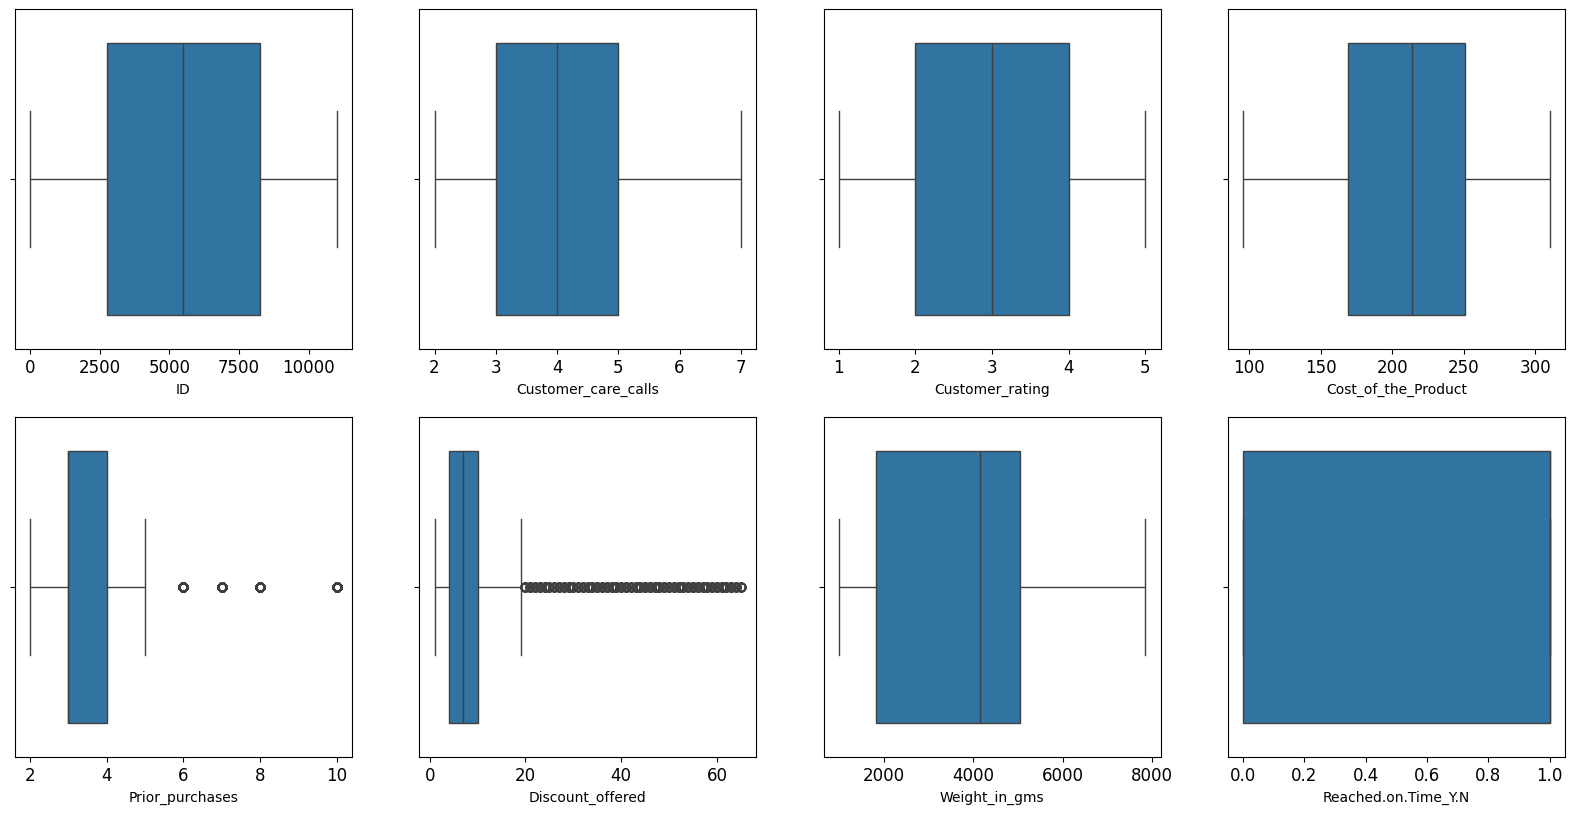

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

def outliers_visual(df):
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns
    plt.figure(figsize=(20, 15))
    for i in range(0, len(num_cols)):
        plt.subplot(3, 4, i+1)
        sns.boxplot(x=df[num_cols[i]])

outliers_visual(df)

Terlihat bahwa *feature* `Prior_purchases` dan `Discount_offered` memiliki *outlier*.

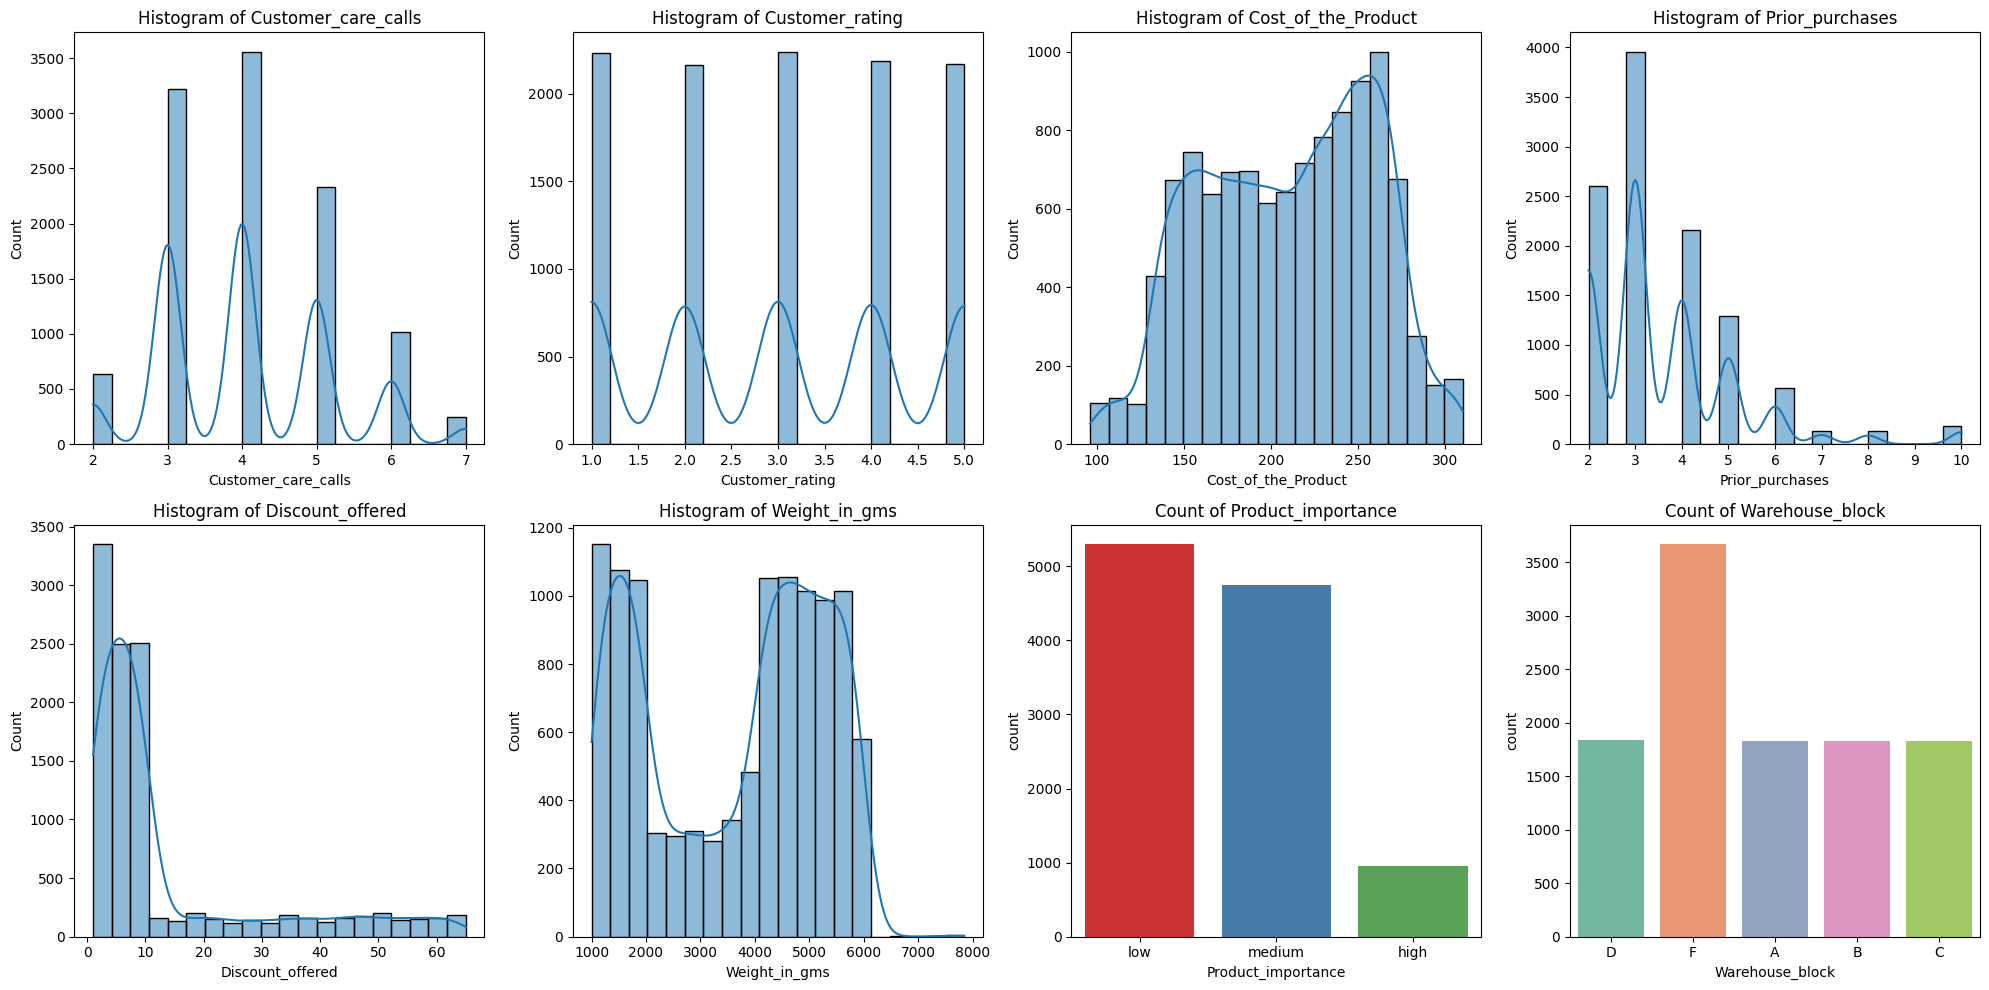

In [10]:
plt.figure(figsize=(20, 10))
num_cols = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 4, i)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Histogram of {col}')
    
# Product_importance
plt.subplot(2, 4, 7)
sns.countplot(x='Product_importance', data=df, palette='Set1')
plt.title('Count of Product_importance')

# Warehouse_block
plt.subplot(2, 4, 8)
sns.countplot(x='Warehouse_block', data=df, palette='Set2')
plt.title('Count of Warehouse_block')

plt.tight_layout()
plt.show()


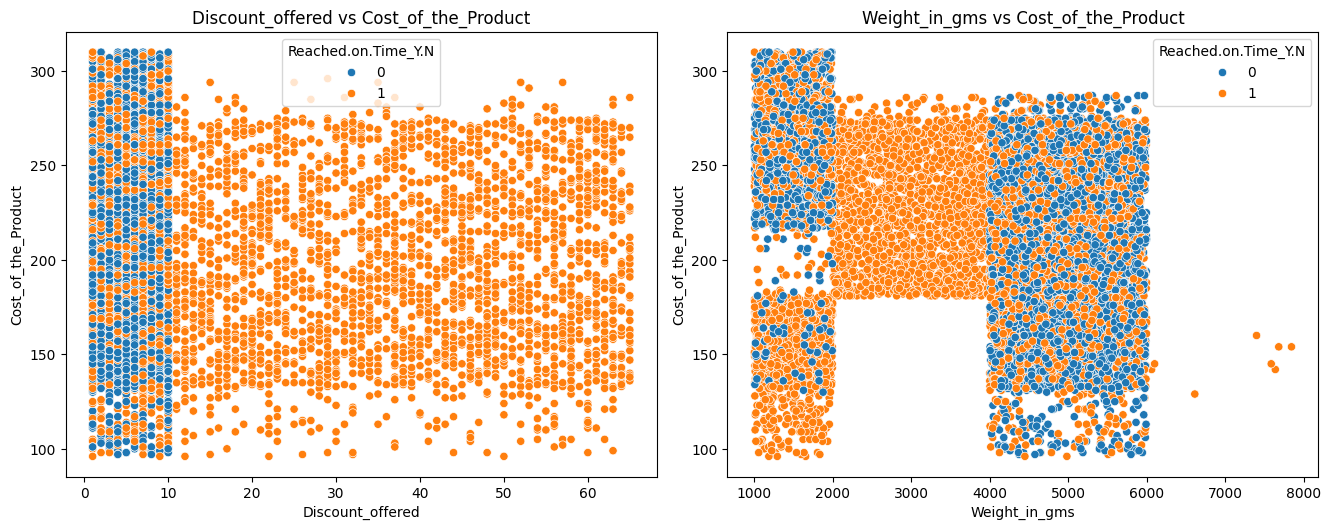

In [9]:
plt.figure(figsize=(20, 10))

# Scatter plot Discount_offered vs Cost_of_the_Product
plt.subplot(2, 3, 4)
sns.scatterplot(x='Discount_offered', y='Cost_of_the_Product', hue='Reached.on.Time_Y.N', data=df)
plt.title('Discount_offered vs Cost_of_the_Product')

# Scatter plot Weight_in_gms vs Cost_of_the_Product
plt.subplot(2, 3, 5)
sns.scatterplot(x='Weight_in_gms', y='Cost_of_the_Product', hue='Reached.on.Time_Y.N', data=df)
plt.title('Weight_in_gms vs Cost_of_the_Product')

plt.tight_layout()
plt.show()


Dari plot grafik diatas, dapat terlihat bahwa:
- `Customer_care_calls` dan `Prior_purchases` memiliki sebaran yang mirip (cenderung *right-skewed*).
- `Customer_rating` memiliki sebaran yang unik, dimana tiap nilai *rating* memiliki nilai yang hampir sama.
- `Cost_of_the_Product` hampir mendekati distribusi normal (cenderung *left-skewed*).
- `Discount_offered` memiliki sebaran *right-skewed*.
- `Weight_in_gms` memiliki sebaran bimodal, dengan distribusi data terpusat pada 2 bagian.
- `Reached.on.Time_Y.N` dengan nilai 1 (pengiriman barang tidak tepat waktu) lebih mendominasi jumlahnya dibandingkan dengan nilai 0 (pengiriman barang tepat waktu).
- Pada scatter plot ini ditunjukan bahwa sebaran produk dengan respektif cost product terhadap discount offered in reached ontime cenderung berada pada discount offerd <10%
- Sedangkan untuk cost product terhadap weight dapat dilihat bahwa cost 100 - 200 dan weight 2 - 4 kg cenderung tidak ontime


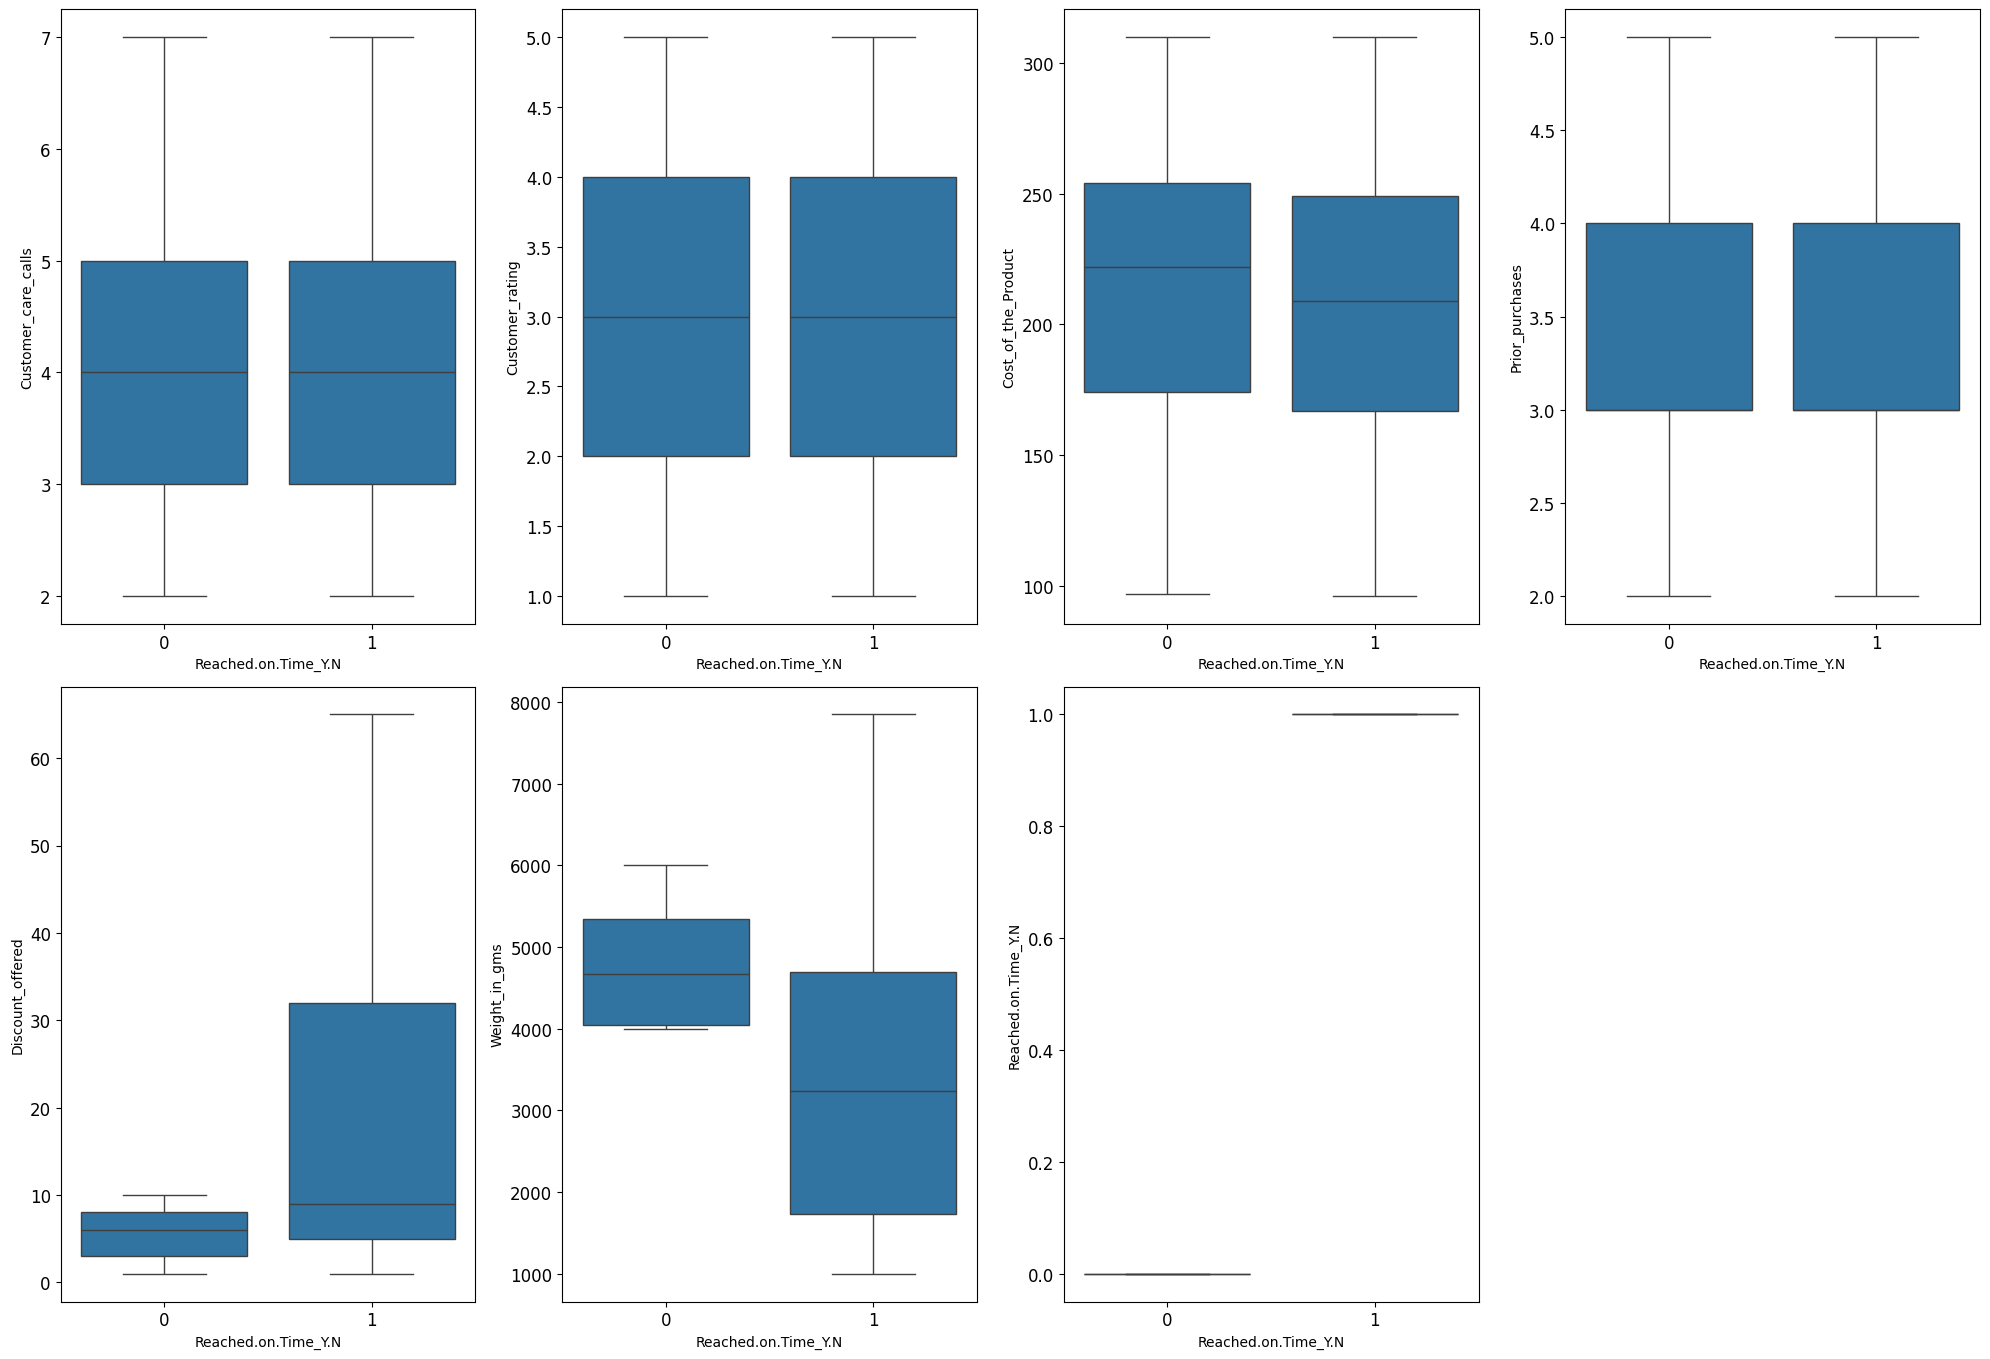

In [14]:
#Boxplot Features numerical terhadap Reached.on.Time_Y.N

plt.figure(figsize = (20,20))
for i in range(0, len(num)):
    plt.subplot(3, 4, i+1)
    sns.boxplot(y=df[num[i]], x= 'Reached.on.Time_Y.N', data = df, showfliers = False)
    plt.tight_layout()

Dari plot *boxplot* diatas, dapat disimpulkan bahwa:
- *Feature* `Cost_of_the_product`, `Discount_offered`, dan `Weight_in_gms` memiliki sebaran cukup berbeda terhadap target `Reached.on.Time_Y.N`, sehingga akan dianalisis lebih lanjut pada ketiga feature terkait.
- Feature `Customer_care_calls`, `Customer_rating`, dan `Prior_purchases` sebarannya hampir sama terhadap target `Reached.on.Time_Y.N`, sehingga EDA tidak berfokus pada ketiga feature ini.

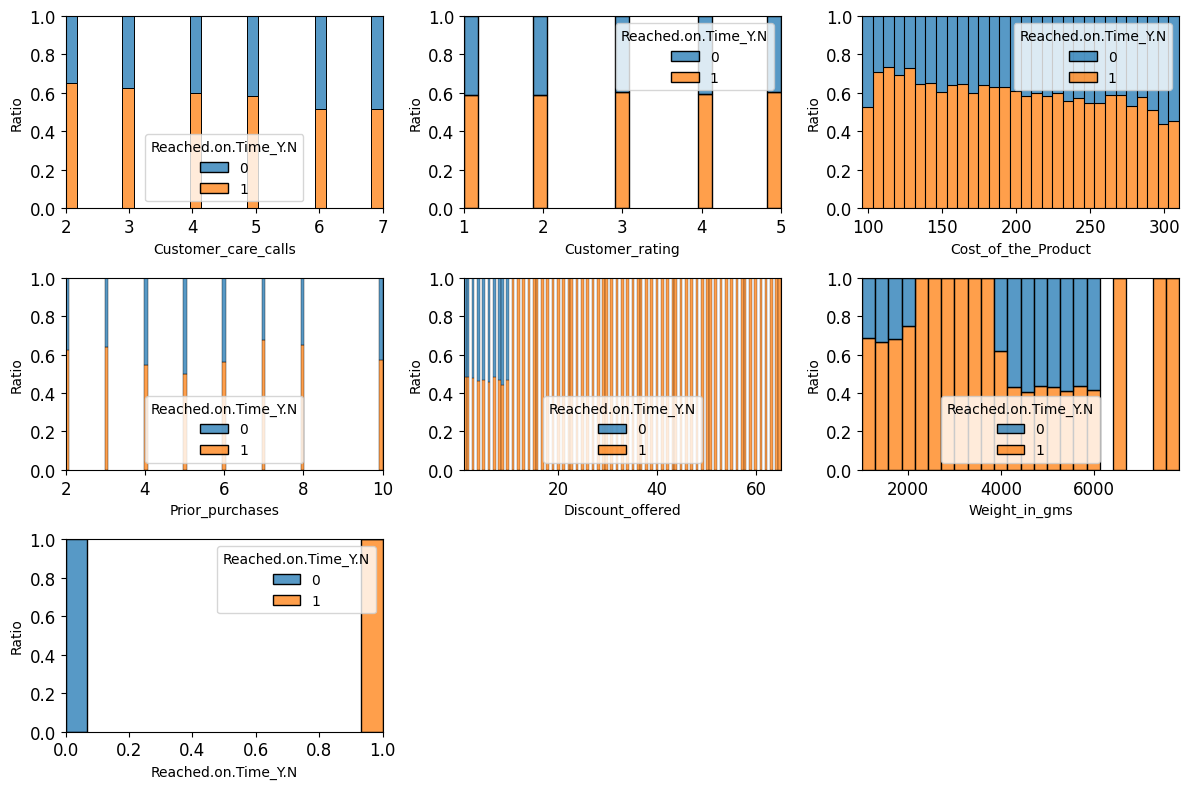

In [15]:
# distribusi feature numerical terhadap target secara proporsional

plt.figure(figsize = (12,8))
for i in range(0, len(num)):
    plt.subplot(3, 3, i+1)
    sns.histplot(x=df[num[i]], hue= 'Reached.on.Time_Y.N', data = df, multiple = 'fill')
    plt.ylabel('Ratio')
    plt.tight_layout()

- Semua pengiriman barang dengan diskon >10% tidak tepat waktu.
- Pengiriman barang dengan berat di antara 2000 - 4000 g dan di atas 6000 g tidak tepat waktu.
- Harga barang (Cost_of_the_Product) yang semakin tinggi cenderung membuat pengiriman barang tepat waktu.

### b. Categoricals

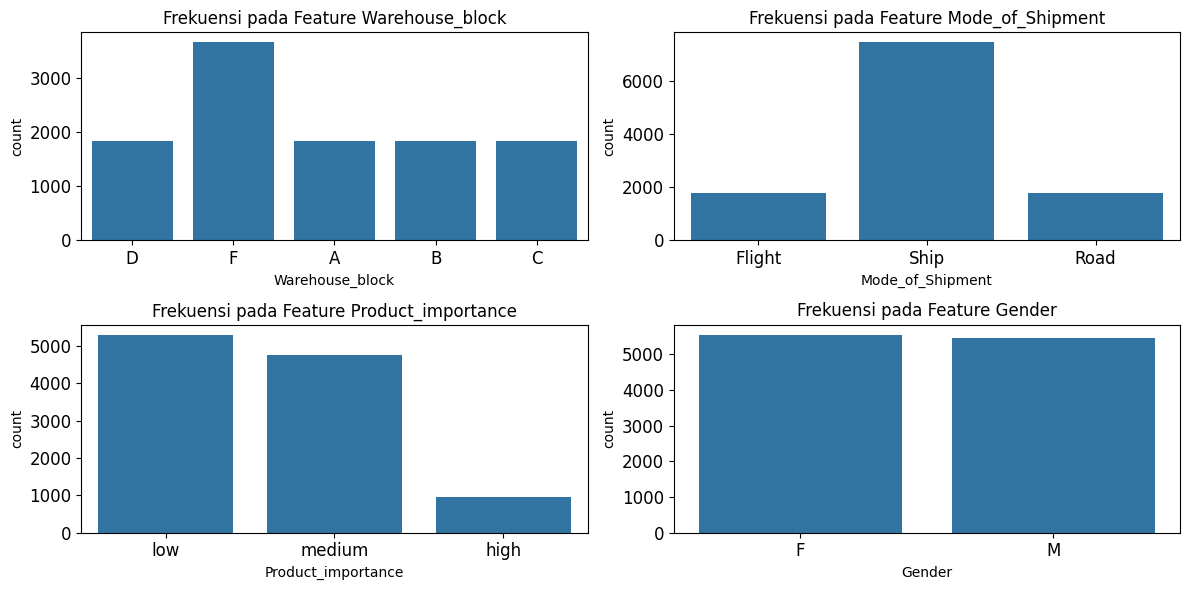

In [16]:
# Distriusi feature kategorikal

plt.figure(figsize = (12,6))
for i in range(0, len(cat)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[cat[i]])
    plt.title(f'Frekuensi pada Feature {cat[i]}')
    plt.tight_layout()

- Terdapat nilai feature yang mendominasi pada feature `Warehouse_block` (F), `Mode_of_Shipment` (Ship), dan `Product_importance` (low).
- Nilai feature `Gender` terlihat merata dengan proporsi sekitar 50:50.
- Perbandingan nilai dalam feature tidak terlalu timpang, sehingga keempat fitur masih akan digunakan dalam Exploratory Data Analysis.

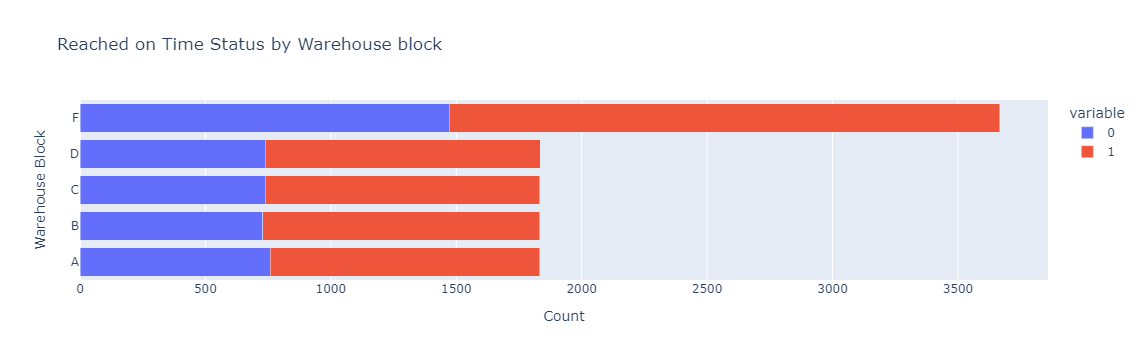

In [25]:
# Ontime Warehouse Block
sum_reached_on_time = df.groupby("Warehouse_block")["Reached.on.Time_Y.N"].value_counts().unstack(fill_value=0).reset_index()

fig = px.bar(sum_reached_on_time, x=[0, 1], y="Warehouse_block", title="Reached on Time Status by Warehouse block",
             labels={"value": "Count", "Warehouse_block": "Warehouse Block", "Reached.on.Time_Y.N": "Reached on Time"},
             orientation='h')
fig.update_layout(barmode='stack')
fig.show()


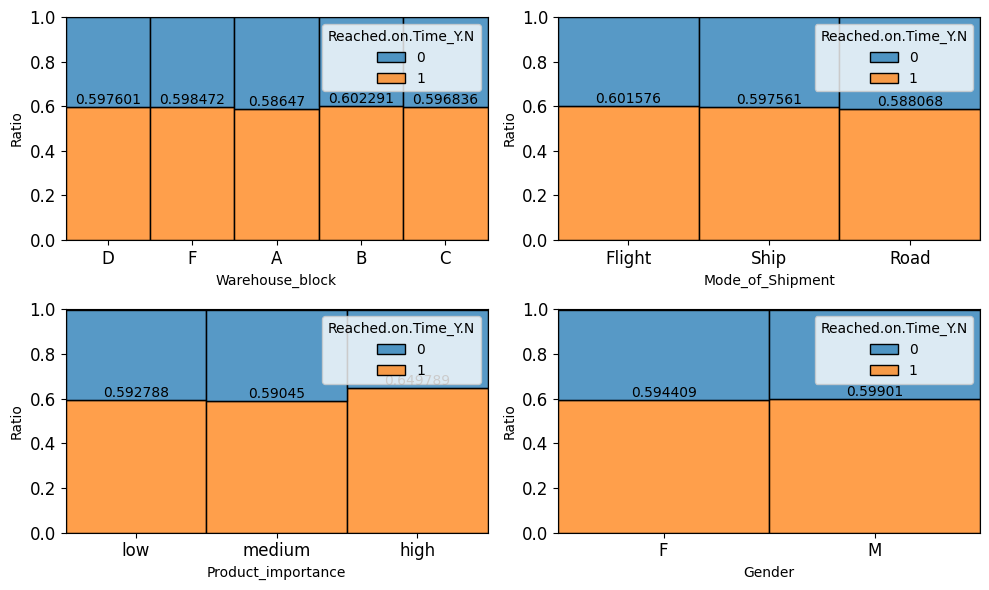

In [18]:
# Distribusi feature kategorikal terhdapp feature target (proporsional)

plt.figure(figsize = (10,6))
for i in range(0, len(cat)):
    fig = plt.subplot(2, 2, i+1)
    sns.histplot(x=df[cat[i]], hue= 'Reached.on.Time_Y.N', data = df, multiple = 'fill')
    plt.bar_label(fig.containers[0])
    plt.ylabel('Ratio')
    plt.tight_layout()

- Barang yang terkirim tepat waktu terbanyak terdapat di warehouse block A. Sedangkan pada block B, paling banyak barang yang tidak terkirim tepat waktu.
- Road menjadi metode pengiriman yang paling banyak yang berhasil mengirimkan barang tepat waktu, sedangkan Flight merupakan metode paling banyak yang tidak berhasil mengirim barang tepat waktu.
- Product_importance yang tergolong medium memiliki jumlah barang paling banyak yang berhasil terkirim tepat waktu, sedangkan produk yang tergolong high, paling banyak gagal dalam mengirimkan barang tepat waktu.
- Rasio barang yang terkirim tepat waktu dengan yang tidak tepat waktu pada feature Gender cenderung sama.

**Follow up untuk data pre processing:**
- Lakukan outlier handling pada feature `Prior_purchases` dan `Discount_offered`.
- Akan dilakukan transformasi log untuk variable bersifat right skewed (Prior_purchases dan Discount_offered). Transformasi log dilakukan untuk meminimalisir penghilangan data yang dikategorikan sebagai outlier.
- Feature `Weight_in_gms` dan `Cost_of_the_Product` bersifat left skewed, sehingga akan dilakukan juga transformasi feature dengan menggunakan standarisasi.
- Melakukan pengelompokkan (grouping) pada feature `Weight_in_gms`/ `Discount_offered`/ `Cost_of_the_Product`.
- `Customer_care_calls` dan `Customer_rating` tidak dilakukan transformasi karena sudah mendekati sebaran distribusi normal.
- Akan dilakukan feature encoding pada feature categorical, untuk mengubah nilai feature menjadi numerical.
- Semua feature akan dilakukan normalisasi scaling sehingga skala antar feature sama.
- Tidak perlu dilakukan handling class imbalance, karena jumlah nilai pada target tidak mengalami ketimpangan (60:40).

## **3. Multivariate Analysis**

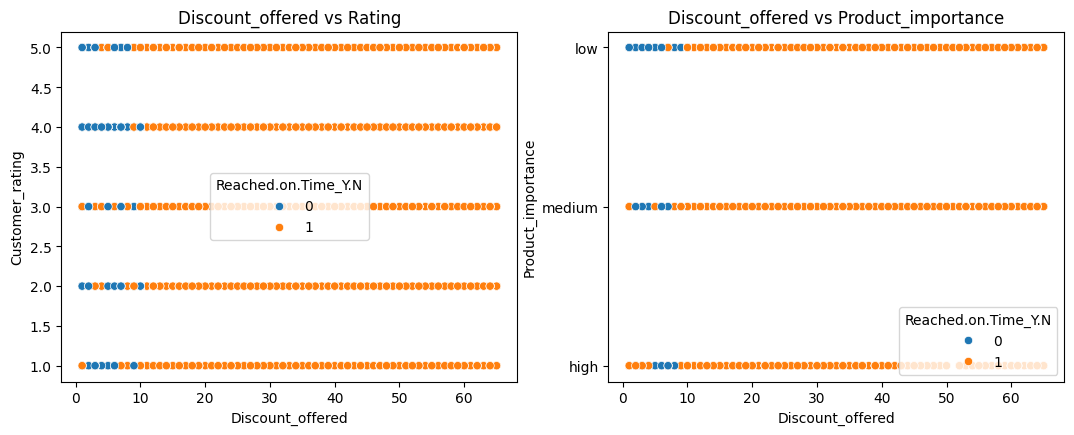

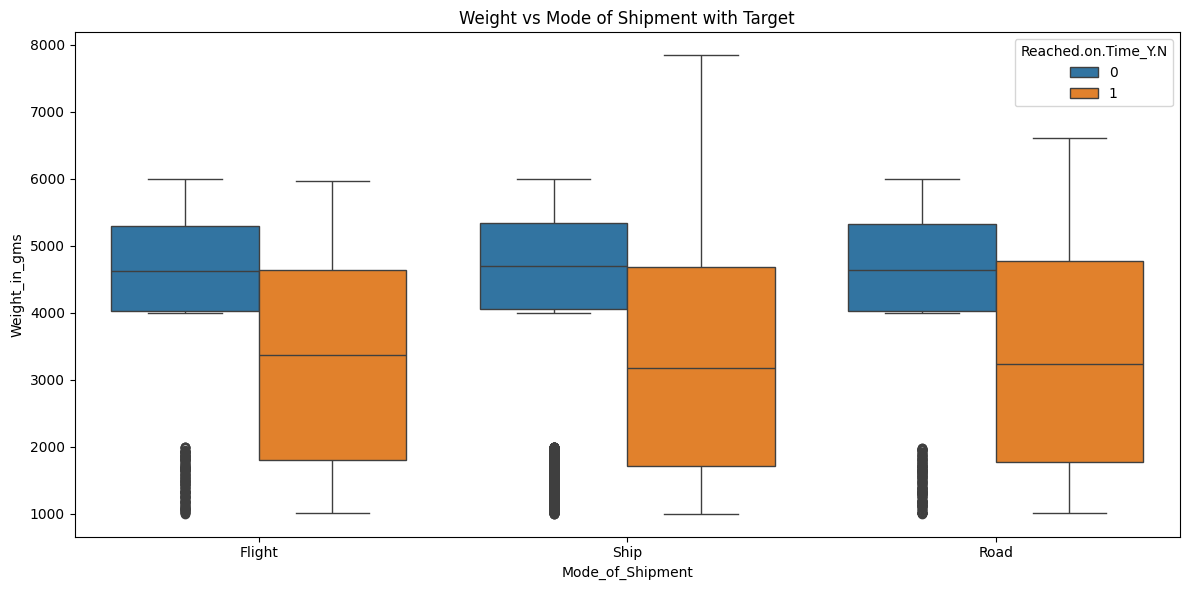

In [15]:
plt.figure(figsize=(20, 10))

# Scatter plot Discount_offered vs Cost_of_the_Product
plt.subplot(2, 3, 4)
sns.scatterplot(x='Discount_offered', y='Customer_rating', hue='Reached.on.Time_Y.N', data=df)
plt.title('Discount_offered vs Rating')

# Scatter plot Weight_in_gms vs Cost_of_the_Product
plt.subplot(2, 3, 5)
sns.scatterplot(x='Discount_offered', y='Product_importance', hue='Reached.on.Time_Y.N', data=df)
plt.title('Discount_offered vs Product_importance')

plt.figure(figsize=(12, 6))
sns.boxplot(x='Mode_of_Shipment', y='Weight_in_gms', hue='Reached.on.Time_Y.N', data=df)
plt.title('Weight vs Mode of Shipment with Target')

plt.tight_layout()
plt.show()


#### Heatmap Plot

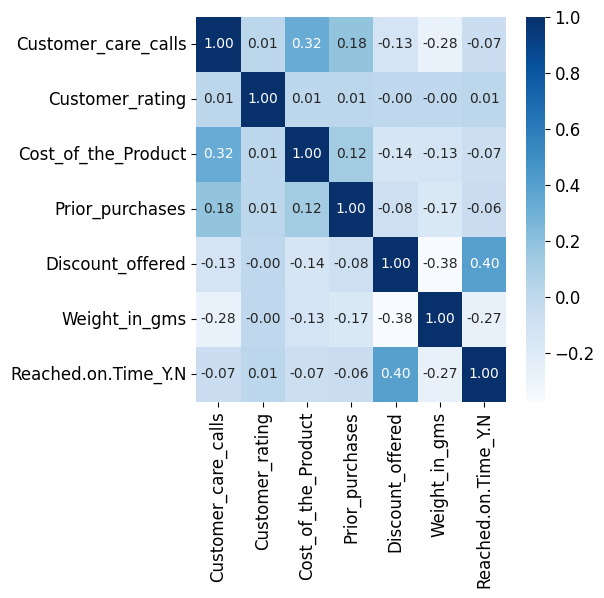

In [19]:
# melihat korelasi dengan heatmap plot

plt.figure(figsize=(5, 5))
sns.heatmap(df[num].corr(), cmap='Blues', annot=True, fmt='.2f')
plt.show()

- Feature `Discount_offered` berkorelasi positif lemah terhadap target (0.40), sehingga semakin tinggi diskon, semakin tinggi pula kecenderungan untuk barang tidak sampai tepat waktu.
- Feature `Weight_in_gms` (berat barang) berkorelasi negatif lemah terhadap target (-0.27), sehingga semakin berat barang, semakin tinggi kecenderungan barang untuk terkirim tepat waktu.
- Terdapat korelasi positif lemah antara `Customer_care_calls` dengan `Cost_of_the_Product` (0.32). Semakin tinggi harga barang, semakin tinggi pula jumlah customer care calls yang diterima.
- Terdapat korelasi negatif lemah antara `Weight_in_gms` dengan `Discount_offered` (-0.38). Semakin tinggi berat barang, semakin kecil nilai diskon yang diberikan.
- Feature lainnya tidak memiliki korelasi secara linier baik dengan antar fitur dan dengan target.

- Semua barang di antara 2000 hingga 4000 gram dan harga barang yang berada di antara 175 hingga 300 tidak terkirim tepat waktu.
- Barang dengan berat di bawah 2000 gram dan harga barang sekitar 100 - 125, tidak terkirim tepat waktu.
- Semua barang yang mendapatkan diskon >10% tidak terkirim tepat waktu, berapapun berat dan harga barangnya.
- Semua barang dengan berat di atas 6000 gram tidak terkirim tepat waktu.

## **4. Business Insight**

In [ ]:
# Membuat lineplot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Weight_in_gms', y='Discount_offered', data=df, marker='o')

# Menambahkan label dan judul
plt.xlabel('Discount Offered')
plt.ylabel('Weight in Grams')
plt.title('Discount Offered vs Weight in Grams by Reached on Time')

### 1. Keterlambatan pengiriman berdasarkan discount

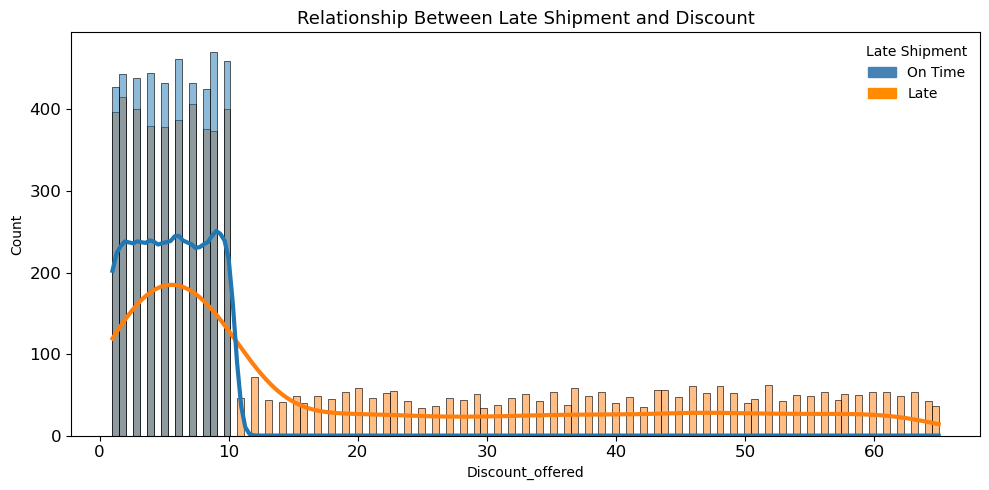

In [5]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='Discount_offered', hue='Reached.on.Time_Y.N', kde=True)
Blue_patch = mpatches.Patch(color='steelblue', label='On Time')
Orange_patch = mpatches.Patch(color='darkorange', label='Late')
plt.legend(handles=[Blue_patch, Orange_patch], frameon=False, title='Late Shipment', loc=1)
plt.title('Relationship Between Late Shipment and Discount', fontsize=13)a
plt.tight_layout()

Insight: <br>
Pemberian discount memiliki pengaruh terhadap ketepatan waktu pengiriman. Pembelian produk dengan discount > 10% mengalami keterlambatan waktu pengiriman. <br>
<br>
Rekomendasi: <br>
Untuk menjaga kepuasan pelanggan, pihak e-commerce dapat memberikan warning atau notifikasi kepada pelanggan yang menggunakan discount tinggi kemungkinan akan terjadi keterlambatan pengiriman.

### 2. Keterlambatan Pengiriman berdasarkan Berat Produk

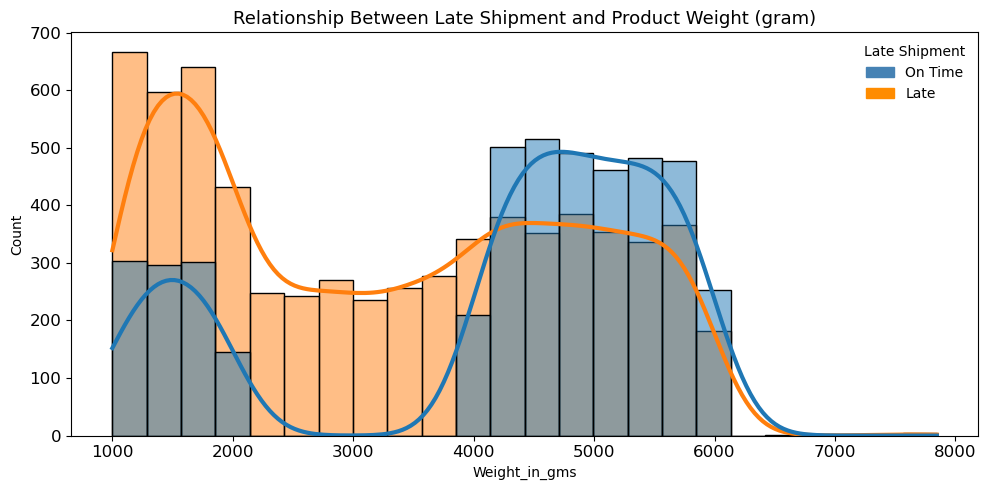

In [14]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='Weight_in_gms', hue='Reached.on.Time_Y.N', kde=True)
Blue_patch = mpatches.Patch(color='steelblue', label='On Time')
Orange_patch = mpatches.Patch(color='darkorange', label='Late')
plt.legend(handles=[Blue_patch, Orange_patch], frameon=False, title='Late Shipment', loc=1)
plt.title('Relationship Between Late Shipment and Product Weight (gram)', fontsize=13)
plt.tight_layout()

Insight: <br>
Berat paket memiliki pengaruh terhadap keterlambatan pengiriman. Paket dengan berat 2 - 4kg dan > 6kg mengalami keterlambatan pengiriman. <br>
<br>
Rekomendasi:<br>
Pihak e-commerce memberikan notifikasi kepada pelanggan dengan berat paket 2-4kg atau >6kg bahwa kemungkinan akan terjadi keterlambatan pengiriman.

### 3. Weight Category vs Shipment

In [112]:
# Mengonversi data ke DataFrame
df = pd.DataFrame(df)

# Membuat kolom kategori berat
bins = [0, 2000, 4000, 6000, 8000]
labels = ['0-2000', '2001-4000', '4001-6000', '6001-8000']
df['weight_category'] = pd.cut(df['Weight_in_gms'], bins=bins, labels=labels, right=False)

<Figure size 1400x800 with 0 Axes>

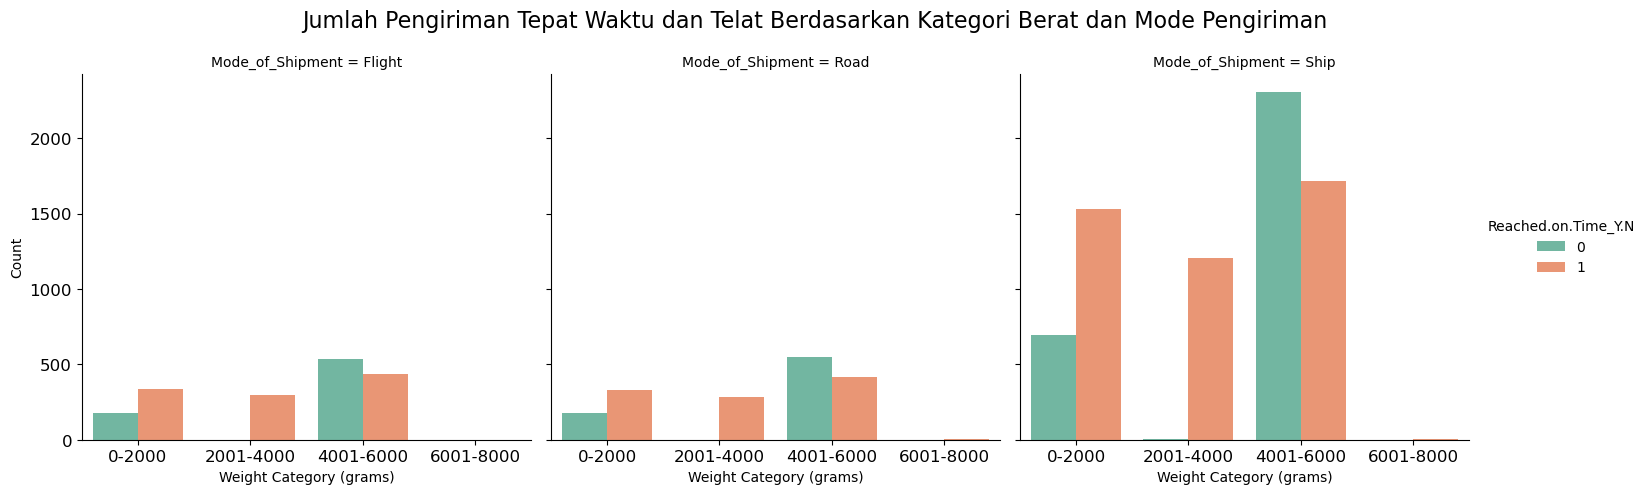

In [115]:
# Menghitung jumlah pengiriman tepat waktu dan telat berdasarkan mode pengiriman dan kategori berat
pivot_table = df.pivot_table(index=['Mode_of_Shipment', 'weight_category'], columns='Reached.on.Time_Y.N', aggfunc='size', fill_value=0)

# Mengatur ulang data untuk visualisasi
df_counts = df.groupby(['Mode_of_Shipment', 'weight_category', 'Reached.on.Time_Y.N']).size().reset_index(name='count')

# Membuat plot
plt.figure(figsize=(14, 8))
g = sns.catplot(
    data=df_counts,
    x='weight_category',
    y='count',
    hue='Reached.on.Time_Y.N',
    col='Mode_of_Shipment',
    kind='bar',
    palette='Set2',
    height=5,
    aspect=1
)

# Menambahkan judul dan label sumbu
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Jumlah Pengiriman Tepat Waktu dan Telat Berdasarkan Kategori Berat dan Mode Pengiriman', fontsize=16)
g.set_axis_labels("Weight Category (grams)", "Count")

# Menampilkan plot
plt.show()

In [117]:
# Menghitung jumlah pengiriman tepat waktu dan telat berdasarkan mode pengiriman dan kategori berat
pivot_table = df.pivot_table(index=['Mode_of_Shipment', 'weight_category'], columns='Reached.on.Time_Y.N', aggfunc='size', fill_value=0)

# Menghitung persentase pengiriman tepat waktu dan telat
pivot_table['total'] = pivot_table.sum(axis=1)
pivot_table['ontime_percentage'] = pivot_table[0] / pivot_table['total'] * 100
pivot_table['telat_percentage'] = pivot_table[1] / pivot_table['total'] * 100

print(pivot_table)

Reached.on.Time_Y.N                  0     1  total  ontime_percentage  \
Mode_of_Shipment weight_category                                         
Flight           0-2000            174   338    512          33.984375   
                 2001-4000           0   296    296           0.000000   
                 4001-6000         534   435    969          55.108359   
                 6001-8000           0     0      0                NaN   
Road             0-2000            178   329    507          35.108481   
                 2001-4000           0   285    285           0.000000   
                 4001-6000         546   419    965          56.580311   
                 6001-8000           1     2      3          33.333333   
Ship             0-2000            692  1530   2222          31.143114   
                 2001-4000           2  1207   1209           0.165426   
                 4001-6000        2309  1714   4023          57.394979   
                 6001-8000           0

<Figure size 1400x800 with 0 Axes>

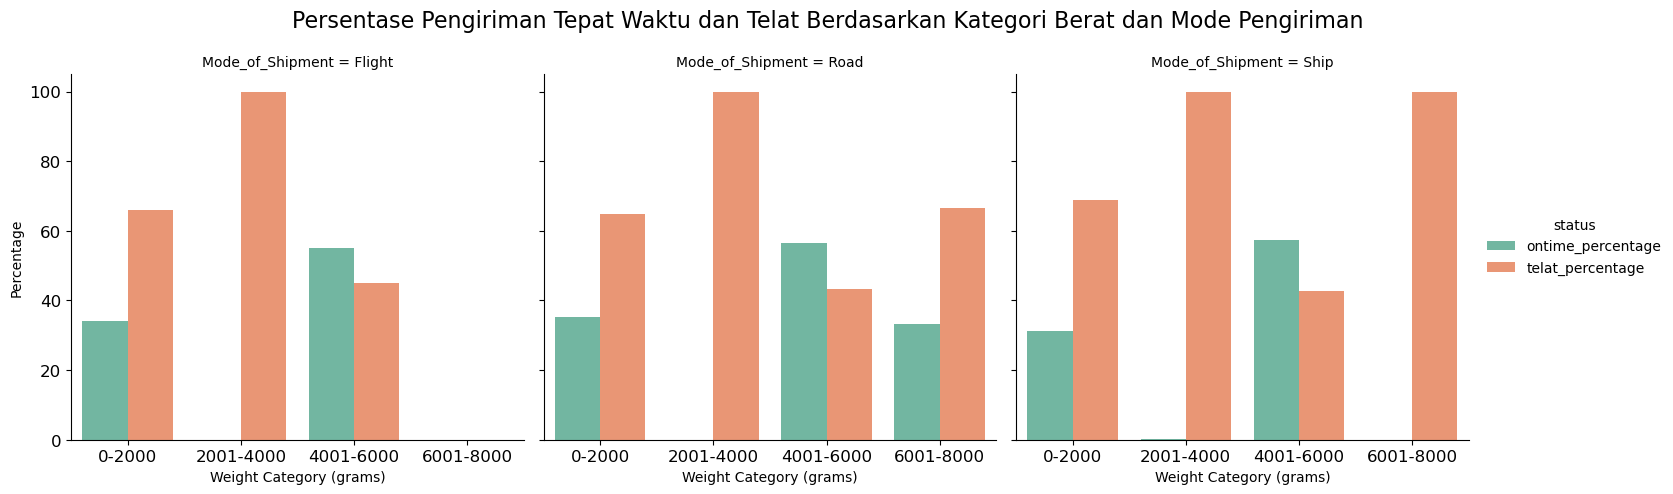

In [9]:
# Mengatur ulang data untuk visualisasi
df_percent = pivot_table.reset_index().melt(id_vars=['Mode_of_Shipment', 'weight_category'], 
                                             value_vars=['ontime_percentage', 'telat_percentage'], 
                                             var_name='status', value_name='percentage')

# Membuat plot
plt.figure(figsize=(14, 8))
g = sns.catplot(
    data=df_percent,
    x='weight_category',
    y='percentage',
    hue='status',
    col='Mode_of_Shipment',
    kind='bar',
    palette='Set2',
    height=5,
    aspect=1
)

# Menambahkan judul dan label sumbu
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Persentase Pengiriman Tepat Waktu dan Telat Berdasarkan Kategori Berat dan Mode Pengiriman', fontsize=16)
g.set_axis_labels("Weight Category (grams)", "Percentage")

# Menampilkan plot
plt.show()


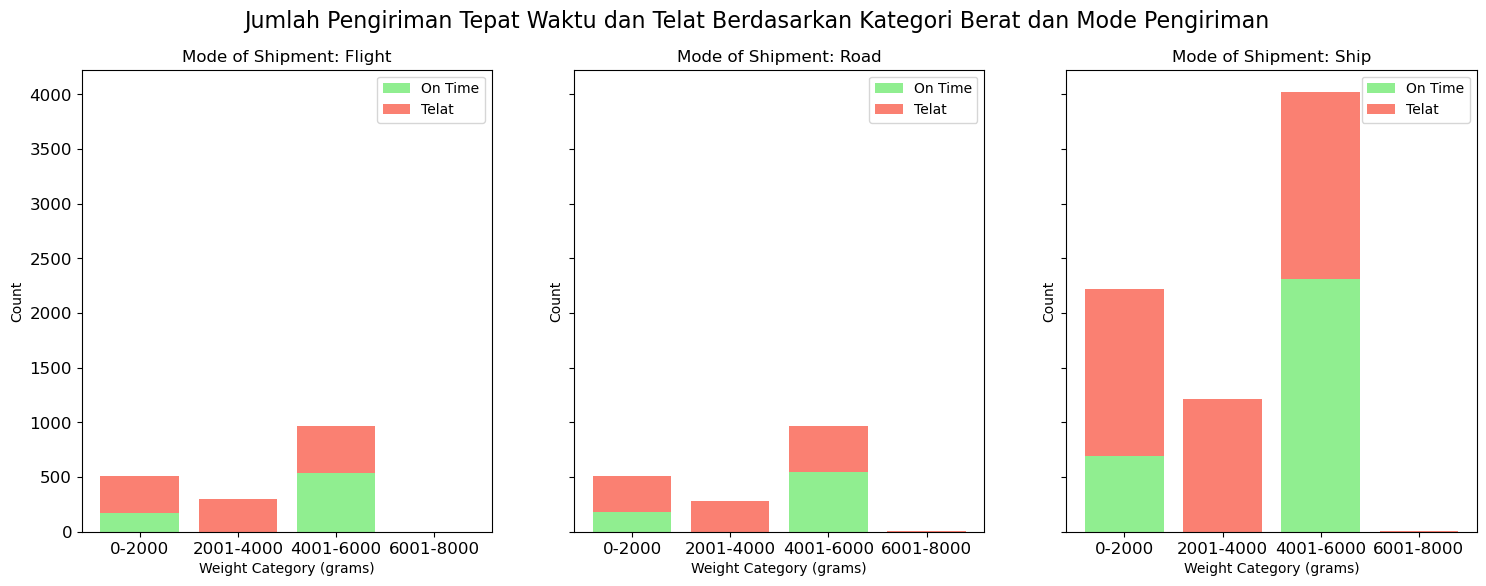

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Membuat kolom kategori berat
bins = [0, 2000, 4000, 6000, 8000]
labels = ['0-2000', '2001-4000', '4001-6000', '6001-8000']
df['weight_category'] = pd.cut(df['Weight_in_gms'], bins=bins, labels=labels, right=False)

# Menghitung jumlah pengiriman tepat waktu dan telat berdasarkan mode pengiriman dan kategori berat
pivot_table = df.pivot_table(index=['Mode_of_Shipment', 'weight_category'], columns='Reached.on.Time_Y.N', aggfunc='size', fill_value=0)

# Menyiapkan data untuk visualisasi stacked bar
pivot_table = pivot_table.reset_index()

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6), sharey=True)

for i, mode in enumerate(pivot_table['Mode_of_Shipment'].unique()):
    subset = pivot_table[pivot_table['Mode_of_Shipment'] == mode]
    axes[i].bar(subset['weight_category'], subset[0], label='On Time', color='lightgreen')
    axes[i].bar(subset['weight_category'], subset[1], bottom=subset[0], label='Telat', color='salmon')
    axes[i].set_title(f'Mode of Shipment: {mode}')
    axes[i].set_xlabel('Weight Category (grams)')
    axes[i].set_ylabel('Count')
    axes[i].legend()

# Menambahkan judul keseluruhan
plt.suptitle('Jumlah Pengiriman Tepat Waktu dan Telat Berdasarkan Kategori Berat dan Mode Pengiriman', fontsize=16)

plt.show()


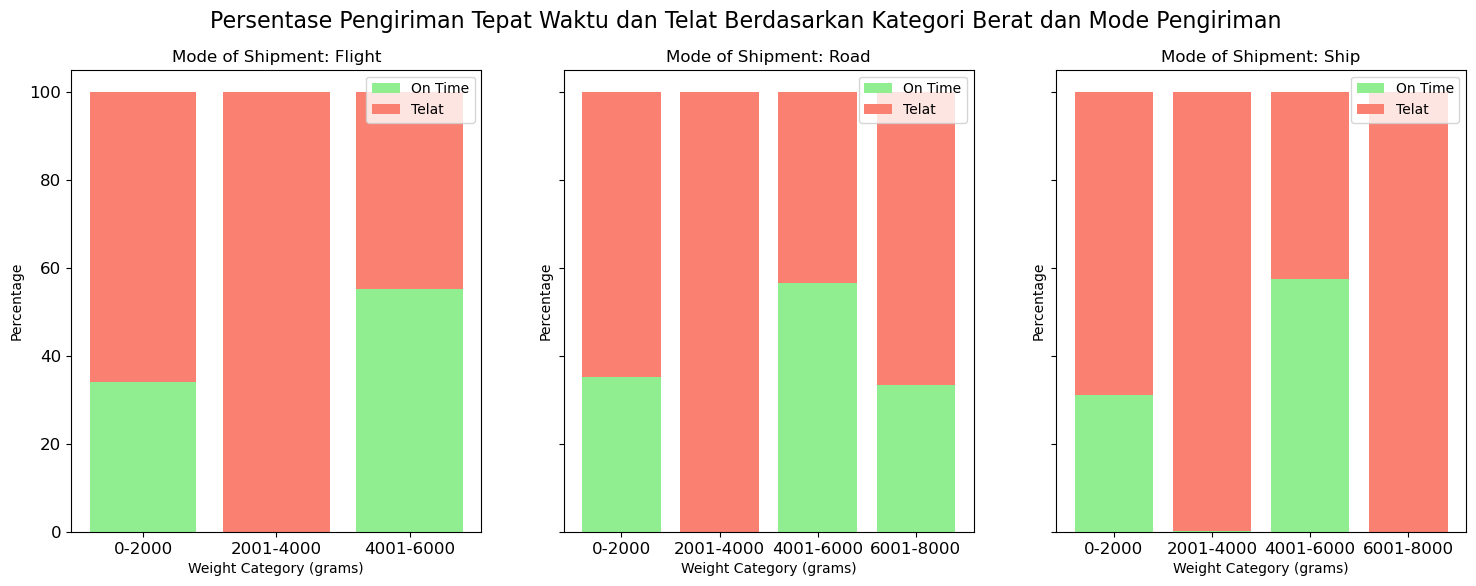

In [13]:
# Membuat kolom kategori berat
bins = [0, 2000, 4000, 6000, 8000]
labels = ['0-2000', '2001-4000', '4001-6000', '6001-8000']
df['weight_category'] = pd.cut(df['Weight_in_gms'], bins=bins, labels=labels, right=False)

# Menghitung jumlah pengiriman tepat waktu dan telat berdasarkan mode pengiriman dan kategori berat
pivot_table = df.pivot_table(index=['Mode_of_Shipment', 'weight_category'], columns='Reached.on.Time_Y.N', aggfunc='size', fill_value=0)

# Menghitung persentase pengiriman tepat waktu dan telat
pivot_table['total'] = pivot_table.sum(axis=1)
pivot_table['ontime_percentage'] = pivot_table[0] / pivot_table['total'] * 100
pivot_table['telat_percentage'] = pivot_table[1] / pivot_table['total'] * 100

# Menyiapkan data untuk visualisasi stacked bar
pivot_table = pivot_table.reset_index()

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6), sharey=True)

for i, mode in enumerate(pivot_table['Mode_of_Shipment'].unique()):
    subset = pivot_table[pivot_table['Mode_of_Shipment'] == mode]
    axes[i].bar(subset['weight_category'], subset['ontime_percentage'], label='On Time', color='lightgreen')
    axes[i].bar(subset['weight_category'], subset['telat_percentage'], bottom=subset['ontime_percentage'], label='Telat', color='salmon')
    axes[i].set_title(f'Mode of Shipment: {mode}')
    axes[i].set_xlabel('Weight Category (grams)')
    axes[i].set_ylabel('Percentage')
    axes[i].legend()

# Menambahkan judul keseluruhan
plt.suptitle('Persentase Pengiriman Tepat Waktu dan Telat Berdasarkan Kategori Berat dan Mode Pengiriman', fontsize=16)

plt.show()


### 4. Weight Category vs Warehouse

#### 4.1 Membuat Kategori Berat

In [ ]:
# Membuat kolom kategori berat
bins = [0, 2000, 4000, 6000, 8000]
labels = ['0-2000', '2001-4000', '4001-6000', '6001-8000']
df['weight_category'] = pd.cut(df['Weight_in_gms'], bins=bins, labels=labels, right=False)

#### 4.2 Jumlah Pengiriman Tepat Waktu dan Telat Berdasarkan Kategori Berat dan Warehouse Block

<Figure size 1400x800 with 0 Axes>

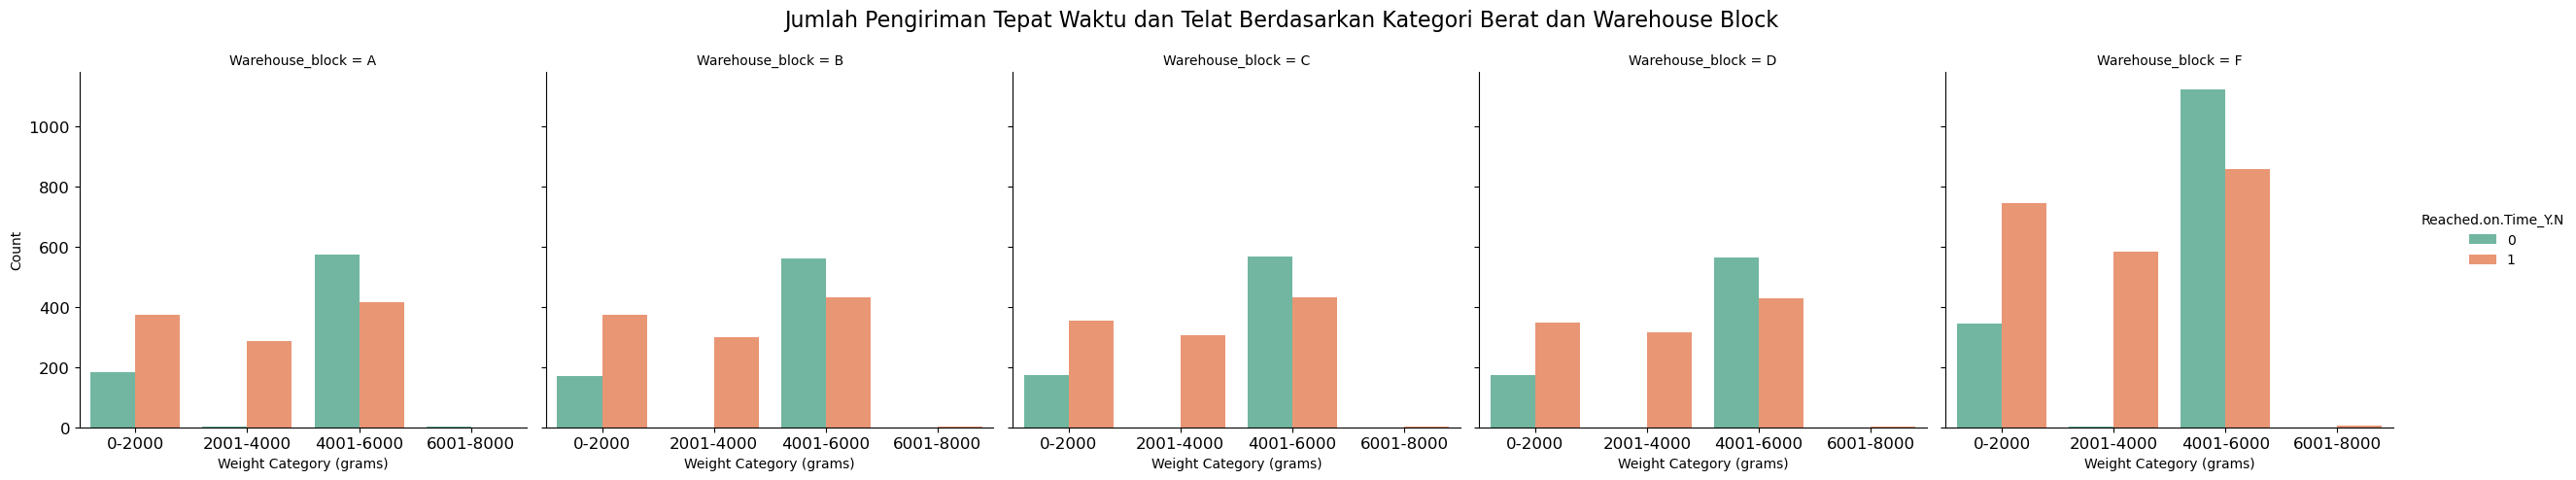

In [58]:
# Menghitung jumlah pengiriman tepat waktu dan telat berdasarkan warehouse dan kategori berat
pivot_table = df.pivot_table(index=['Warehouse_block', 'weight_category'], columns='Reached.on.Time_Y.N', aggfunc='size', fill_value=0)

# Mengatur ulang data untuk visualisasi
df_counts = df.groupby(['Warehouse_block', 'weight_category', 'Reached.on.Time_Y.N']).size().reset_index(name='count')

# Membuat plot
plt.figure(figsize=(14, 8))
g = sns.catplot(
    data=df_counts,
    x='weight_category',
    y='count',
    hue='Reached.on.Time_Y.N',
    col='Warehouse_block',
    kind='bar',
    palette='Set2',
    height=5,
    aspect=1
)

# Menambahkan judul dan label sumbu
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Jumlah Pengiriman Tepat Waktu dan Telat Berdasarkan Kategori Berat dan Warehouse Block', fontsize=16)
g.set_axis_labels("Weight Category (grams)", "Count")

# Menampilkan plot
plt.show()

#### 4.3 Menghitung Persentase

In [57]:
# Menghitung jumlah pengiriman tepat waktu dan telat berdasarkan warehouse dan kategori berat
pivot_table = df.pivot_table(index=['Warehouse_block', 'weight_category'], columns='Reached.on.Time_Y.N', aggfunc='size', fill_value=0)

# Menghitung persentase pengiriman tepat waktu dan telat
pivot_table['total'] = pivot_table.sum(axis=1)
pivot_table['ontime_percentage'] = pivot_table[0] / pivot_table['total'] * 100
pivot_table['telat_percentage'] = pivot_table[1] / pivot_table['total'] * 100

print(pivot_table)

Reached.on.Time_Y.N                 0    1  total  ontime_percentage  \
Warehouse_block weight_category                                        
A               0-2000            183  373    556          32.913669   
                2001-4000           1  286    287           0.348432   
                4001-6000         573  416    989          57.937310   
                6001-8000           1    0      1         100.000000   
B               0-2000            169  373    542          31.180812   
                2001-4000           0  298    298           0.000000   
                4001-6000         560  431    991          56.508577   
                6001-8000           0    2      2           0.000000   
C               0-2000            172  356    528          32.575758   
                2001-4000           0  306    306           0.000000   
                4001-6000         567  431    998          56.813627   
                6001-8000           0    1      1           0.00

#### 4.4 Stacked Bar Chart - Persentase

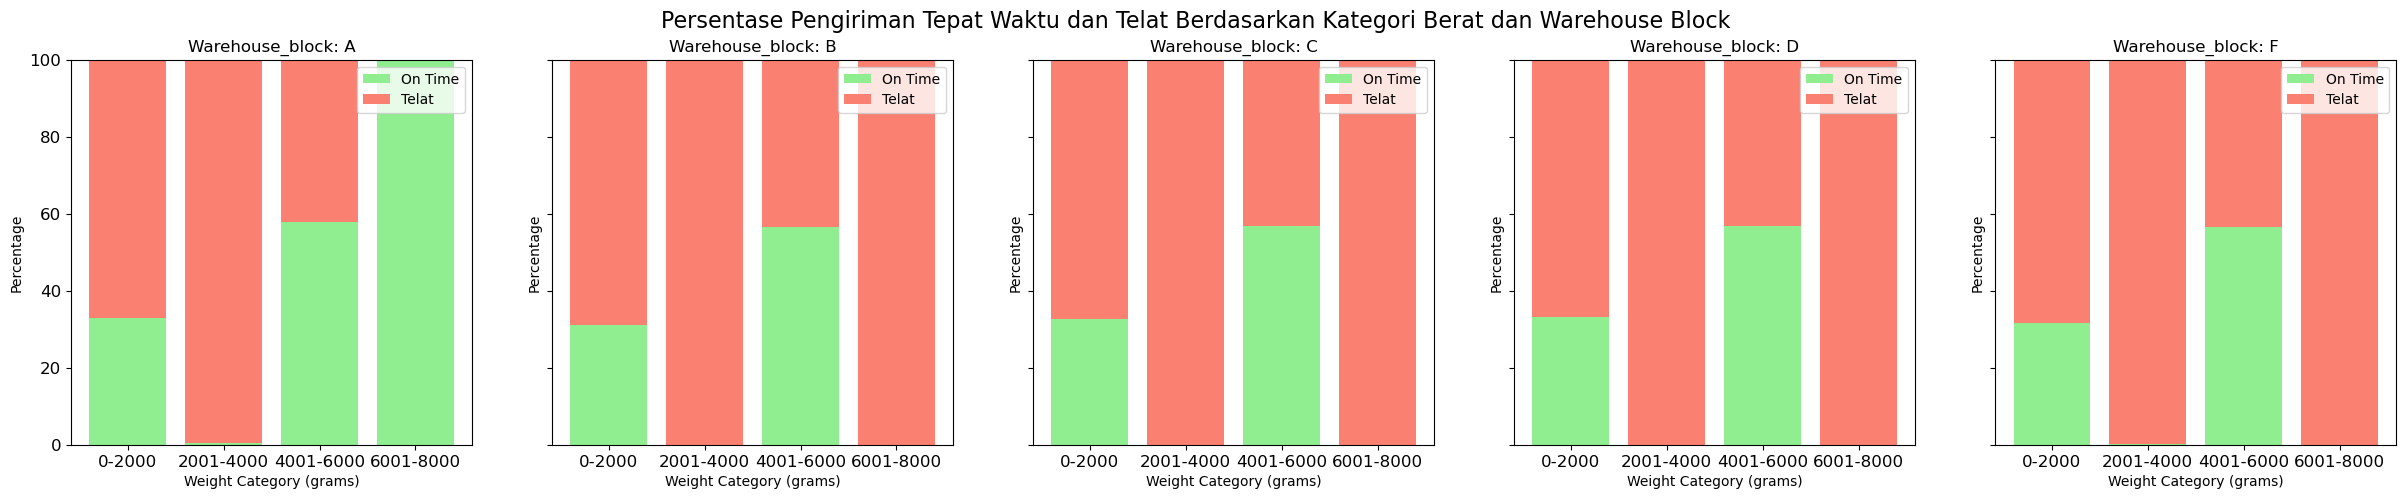

In [110]:
# Menghitung jumlah pengiriman tepat waktu dan telat berdasarkan mode pengiriman dan kategori berat
pivot_table = df.pivot_table(index=['Warehouse_block', 'weight_category'], columns='Reached.on.Time_Y.N', aggfunc='size', fill_value=0)

# Menghitung persentase pengiriman tepat waktu dan telat
pivot_table['total'] = pivot_table.sum(axis=1)
pivot_table['ontime_percentage'] = pivot_table[0] / pivot_table['total'] * 100
pivot_table['telat_percentage'] = pivot_table[1] / pivot_table['total'] * 100

# Menyiapkan data untuk visualisasi stacked bar
pivot_table = pivot_table.reset_index()

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(30, 5), sharey=True)

for i, mode in enumerate(pivot_table['Warehouse_block'].unique()):
    subset = pivot_table[pivot_table['Warehouse_block'] == mode]
    axes[i].bar(subset['weight_category'], subset['ontime_percentage'], label='On Time', color='lightgreen')
    axes[i].bar(subset['weight_category'], subset['telat_percentage'], bottom=subset['ontime_percentage'], label='Telat', color='salmon')
    axes[i].set_title(f'Warehouse_block: {mode}')
    axes[i].set_xlabel('Weight Category (grams)')
    axes[i].set_ylabel('Percentage')
    axes[i].legend()

# Menambahkan judul keseluruhan
plt.suptitle('Persentase Pengiriman Tepat Waktu dan Telat Berdasarkan Kategori Berat dan Warehouse Block', fontsize=16)

plt.show()


### 5. Cost Category vs Warehouse

#### 5.1 Membuat Kategori Cost

In [86]:
# Membuat kolom kategori cost
bins = [0, 50, 100, 150, 200, 250, 300, 350]
labels = ['0-50', '51-100', '101-150', '150-200', '201-250', '251-300', '301-350']
df['cost_category'] = pd.cut(df['Cost_of_the_Product'], bins=bins, labels=labels, right=False)

#### 5.2 Jumlah Pengiriman Tepat Waktu dan Telat Berdasarkan Kategori Cost dan Warehouse Block

<Figure size 2500x500 with 0 Axes>

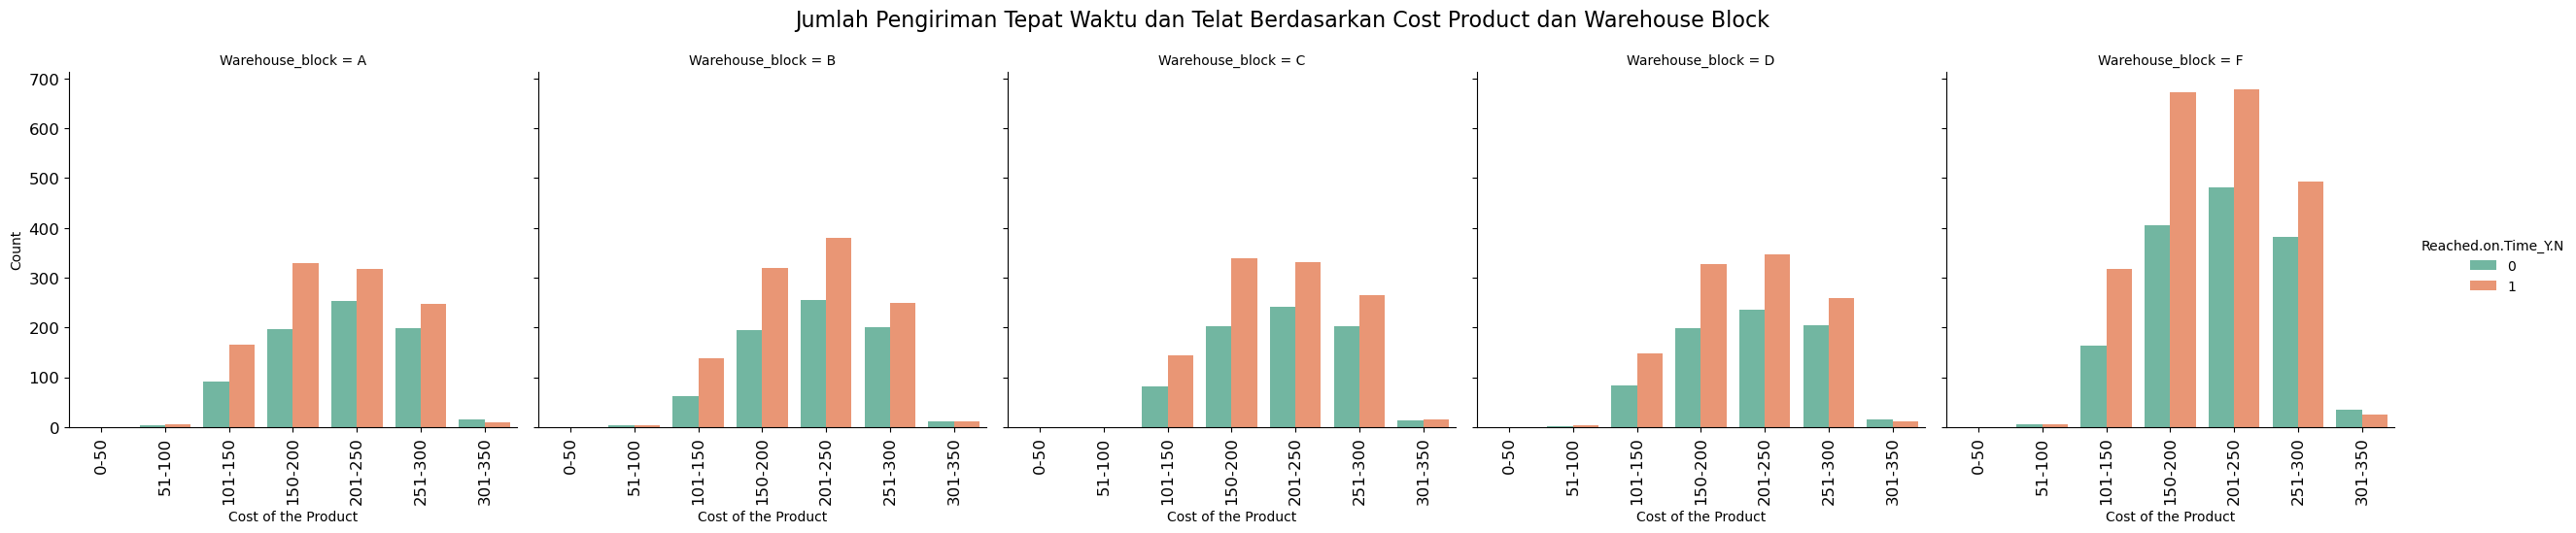

In [85]:
# Menghitung jumlah pengiriman tepat waktu dan telat berdasarkan warehouse dan kategori berat
pivot_table = df.pivot_table(index=['Warehouse_block', 'cost_category'], columns='Reached.on.Time_Y.N', aggfunc='size', fill_value=0)

# Mengatur ulang data untuk visualisasi
df_counts = df.groupby(['Warehouse_block', 'cost_category', 'Reached.on.Time_Y.N']).size().reset_index(name='count')

# Membuat plot
plt.figure(figsize=(25, 5))
g = sns.catplot(
    data=df_counts,
    x='cost_category',
    y='count',
    hue='Reached.on.Time_Y.N',
    col='Warehouse_block',
    kind='bar',
    palette='Set2',
    height=5,
    aspect=1
)

# Menambahkan judul dan label sumbu
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Jumlah Pengiriman Tepat Waktu dan Telat Berdasarkan Cost Product dan Warehouse Block', fontsize=16)
g.set_axis_labels("Cost of the Product", "Count")

# Mengatur label sumbu x menjadi vertikal
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Menampilkan plot
plt.show()

#### 5.3 Menghitung Persentase

In [84]:
# Menghitung jumlah pengiriman tepat waktu dan telat berdasarkan mode pengiriman dan kategori berat
pivot_table = df.pivot_table(index=['Warehouse_block', 'cost_category'], columns='Reached.on.Time_Y.N', aggfunc='size', fill_value=0)

# Menghitung persentase pengiriman tepat waktu dan telat
pivot_table['total'] = pivot_table.sum(axis=1)
pivot_table['ontime_percentage'] = pivot_table[0] / pivot_table['total'] * 100
pivot_table['telat_percentage'] = pivot_table[1] / pivot_table['total'] * 100

print(pivot_table)

Reached.on.Time_Y.N              0    1  total  ontime_percentage  \
Warehouse_block cost_category                                       
A               0-50             0    0      0                NaN   
                51-100           3    6      9          33.333333   
                101-150         91  165    256          35.546875   
                150-200        196  330    526          37.262357   
                201-250        254  317    571          44.483363   
                251-300        198  247    445          44.494382   
                301-350         16   10     26          61.538462   
B               0-50             0    0      0                NaN   
                51-100           3    3      6          50.000000   
                101-150         63  139    202          31.188119   
                150-200        195  320    515          37.864078   
                201-250        255  380    635          40.157480   
                251-300        201

#### 5.4 Stacked Bar Chart - Persentase

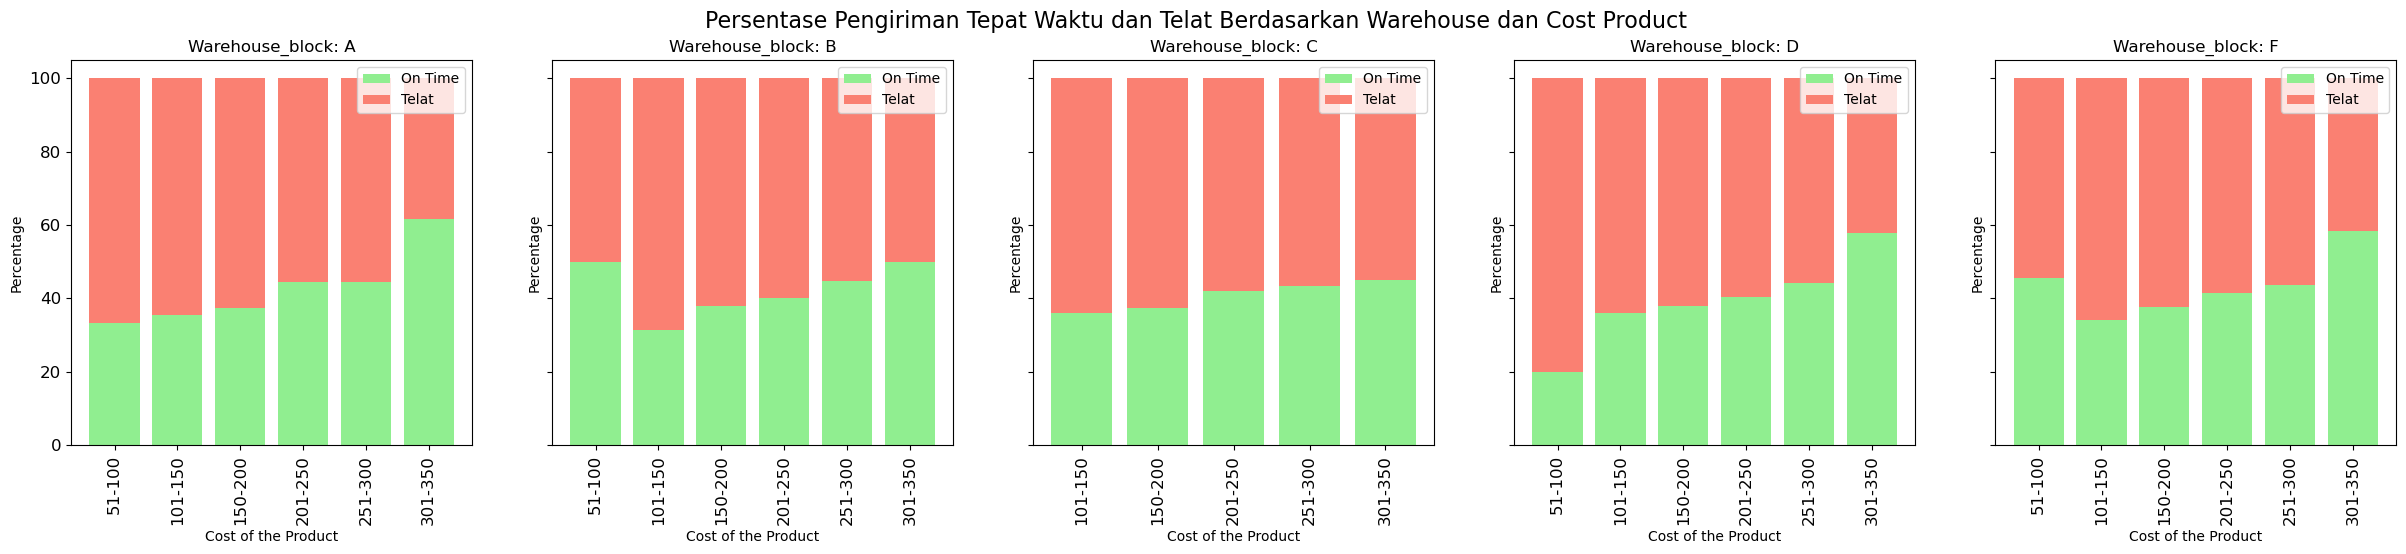

In [83]:
# Menghitung jumlah pengiriman tepat waktu dan telat berdasarkan mode pengiriman dan kategori berat
pivot_table = df.pivot_table(index=['Warehouse_block', 'cost_category'], columns='Reached.on.Time_Y.N', aggfunc='size', fill_value=0)

# Menghitung persentase pengiriman tepat waktu dan telat
pivot_table['total'] = pivot_table.sum(axis=1)
pivot_table['ontime_percentage'] = pivot_table[0] / pivot_table['total'] * 100
pivot_table['telat_percentage'] = pivot_table[1] / pivot_table['total'] * 100

# Menyiapkan data untuk visualisasi stacked bar
pivot_table = pivot_table.reset_index()

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(30, 5), sharey=True)

for i, mode in enumerate(pivot_table['Warehouse_block'].unique()):
    subset = pivot_table[pivot_table['Warehouse_block'] == mode]
    axes[i].bar(subset['cost_category'], subset['ontime_percentage'], label='On Time', color='lightgreen')
    axes[i].bar(subset['cost_category'], subset['telat_percentage'], bottom=subset['ontime_percentage'], label='Telat', color='salmon')
    axes[i].set_title(f'Warehouse_block: {mode}')
    axes[i].set_xlabel('Cost of the Product')
    axes[i].set_ylabel('Percentage')
    axes[i].legend()
    axes[i].set_xticklabels(labels, rotation=90)

# Menambahkan judul keseluruhan
plt.suptitle('Persentase Pengiriman Tepat Waktu dan Telat Berdasarkan Warehouse dan Cost Product', fontsize=16)

plt.show()


### 6. Cost Category vs Shipment

#### 6.1 Membuat Kategori Cost

In [88]:
# Membuat kolom kategori cost
bins = [0, 50, 100, 150, 200, 250, 300, 350]
labels = ['0-50', '51-100', '101-150', '150-200', '201-250', '251-300', '301-350']
df['cost_category'] = pd.cut(df['Cost_of_the_Product'], bins=bins, labels=labels, right=False)

#### 6.2 Jumlah Pengiriman Tepat Waktu dan Telat Berdasarkan Kategori Cost dan Mode of Shipment

<Figure size 2500x500 with 0 Axes>

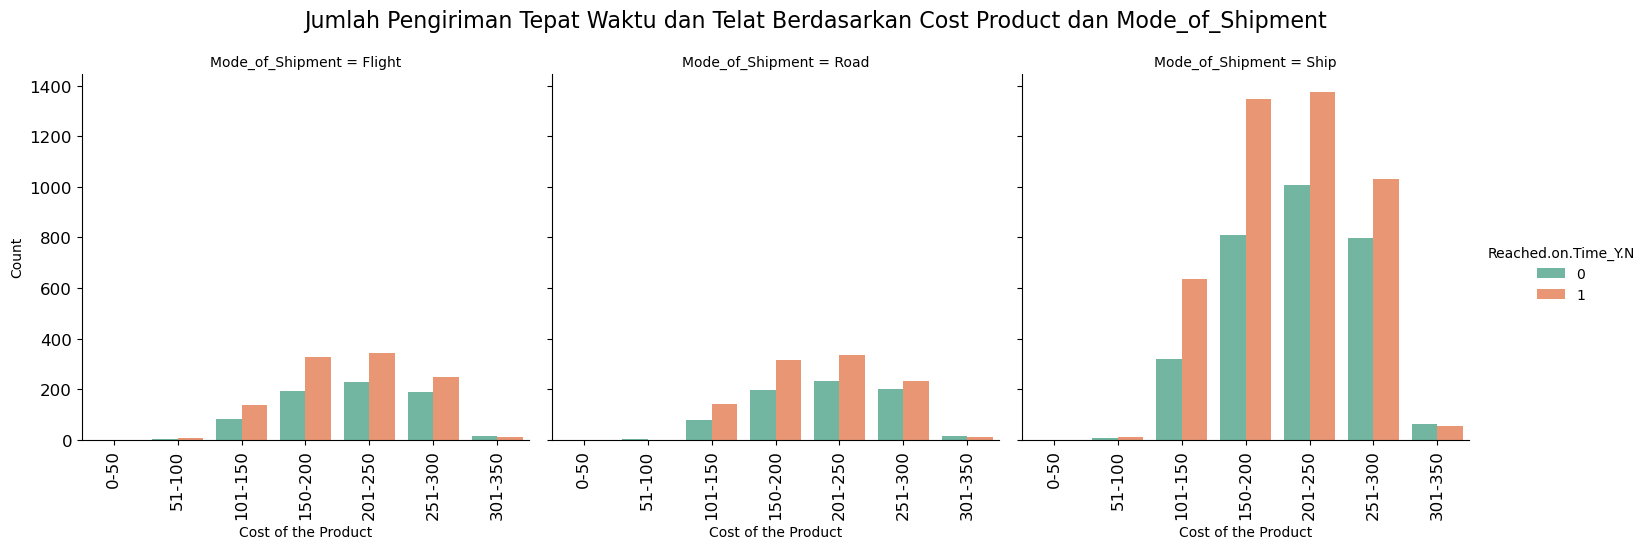

In [80]:
# Menghitung jumlah pengiriman tepat waktu dan telat berdasarkan warehouse dan kategori berat
pivot_table = df.pivot_table(index=['Mode_of_Shipment', 'cost_category'], columns='Reached.on.Time_Y.N', aggfunc='size', fill_value=0)

# Mengatur ulang data untuk visualisasi
df_counts = df.groupby(['Mode_of_Shipment', 'cost_category', 'Reached.on.Time_Y.N']).size().reset_index(name='count')

# Membuat plot
plt.figure(figsize=(25, 5))
g = sns.catplot(
    data=df_counts,
    x='cost_category',
    y='count',
    hue='Reached.on.Time_Y.N',
    col='Mode_of_Shipment',
    kind='bar',
    palette='Set2',
    height=5,
    aspect=1
)

# Menambahkan judul dan label sumbu
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Jumlah Pengiriman Tepat Waktu dan Telat Berdasarkan Cost Product dan Mode_of_Shipment', fontsize=16)
g.set_axis_labels("Cost of the Product", "Count")

# Mengatur label sumbu x menjadi vertikal
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Menampilkan plot
plt.show()

#### 6.3 Menghitung Persentase

In [81]:
# Menghitung jumlah pengiriman tepat waktu dan telat berdasarkan mode pengiriman dan kategori cost of product
pivot_table = df.pivot_table(index=['Mode_of_Shipment', 'cost_category'], columns='Reached.on.Time_Y.N', aggfunc='size', fill_value=0)

# Menghitung persentase pengiriman tepat waktu dan telat
pivot_table['total'] = pivot_table.sum(axis=1)
pivot_table['ontime_percentage'] = pivot_table[0] / pivot_table['total'] * 100
pivot_table['telat_percentage'] = pivot_table[1] / pivot_table['total'] * 100

print(pivot_table)

Reached.on.Time_Y.N                0     1  total  ontime_percentage  \
Mode_of_Shipment cost_category                                         
Flight           0-50              0     0      0                NaN   
                 51-100            3     6      9          33.333333   
                 101-150          82   137    219          37.442922   
                 150-200         192   327    519          36.994220   
                 201-250         229   342    571          40.105079   
                 251-300         188   247    435          43.218391   
                 301-350          14    10     24          58.333333   
Road             0-50              0     0      0                NaN   
                 51-100            2     0      2         100.000000   
                 101-150          80   142    222          36.036036   
                 150-200         196   315    511          38.356164   
                 201-250         231   335    566          40.81

#### 6.4 Stacked Bar Chart - Persentase

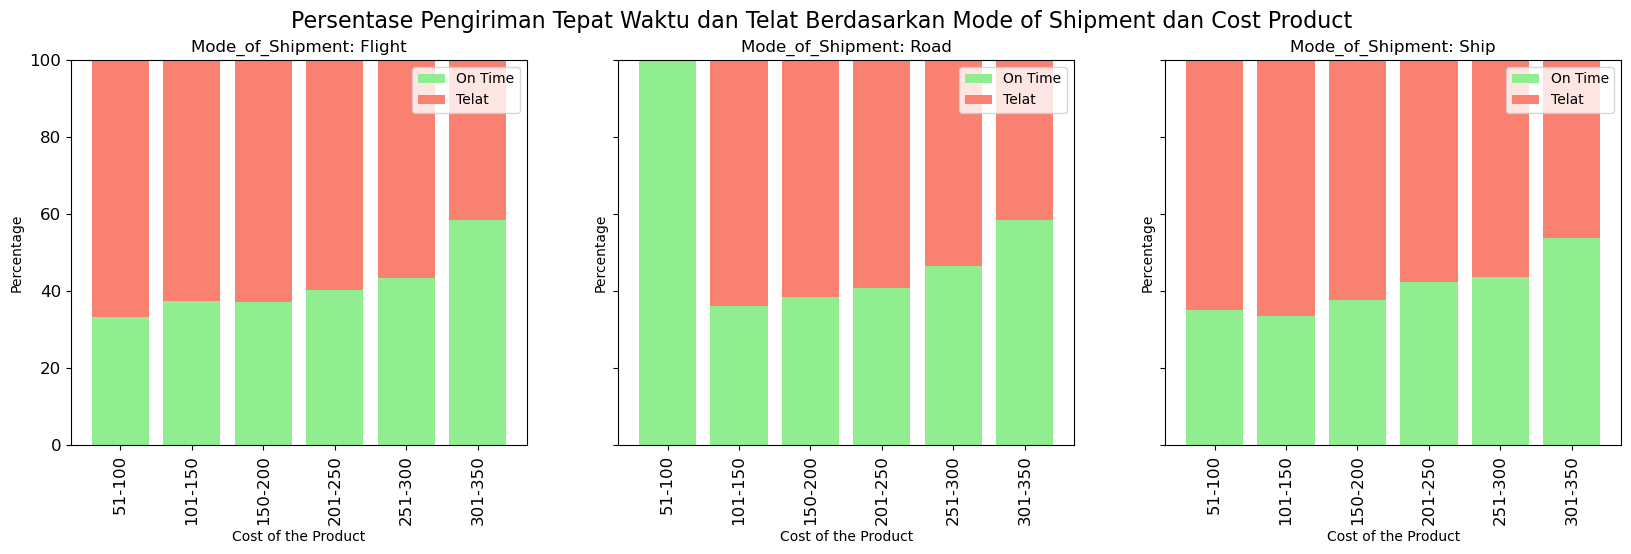

In [82]:
# Menghitung jumlah pengiriman tepat waktu dan telat berdasarkan mode pengiriman dan kategori berat
pivot_table = df.pivot_table(index=['Mode_of_Shipment', 'cost_category'], columns='Reached.on.Time_Y.N', aggfunc='size', fill_value=0)

# Menghitung persentase pengiriman tepat waktu dan telat
pivot_table['total'] = pivot_table.sum(axis=1)
pivot_table['ontime_percentage'] = pivot_table[0] / pivot_table['total'] * 100
pivot_table['telat_percentage'] = pivot_table[1] / pivot_table['total'] * 100

# Menyiapkan data untuk visualisasi stacked bar
pivot_table = pivot_table.reset_index()

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,5), sharey=True)

for i, mode in enumerate(pivot_table['Mode_of_Shipment'].unique()):
    subset = pivot_table[pivot_table['Mode_of_Shipment'] == mode]
    axes[i].bar(subset['cost_category'], subset['ontime_percentage'], label='On Time', color='lightgreen')
    axes[i].bar(subset['cost_category'], subset['telat_percentage'], bottom=subset['ontime_percentage'], label='Telat', color='salmon')
    axes[i].set_title(f'Mode_of_Shipment: {mode}')
    axes[i].set_xlabel('Cost of the Product')
    axes[i].set_ylabel('Percentage')
    axes[i].legend()
    axes[i].set_xticklabels(labels, rotation=90)

# Menambahkan judul keseluruhan
plt.suptitle('Persentase Pengiriman Tepat Waktu dan Telat Berdasarkan Mode of Shipment dan Cost Product', fontsize=16)

plt.show()

### 7. Discount Offered vs Warehouse

#### 7.1 Membuat Kategori Discount

In [98]:
# Membuat kolom kategori cost
bins = [0, 10, 20, 30, 40, 50, 60, 70]
labels = ['10', '20', '30', '40', '50', '60', '70']
df['disc_category'] = pd.cut(df['Discount_offered'], bins=bins, labels=labels, right=False)

#### 7.2 Jumlah Pengiriman Tepat Waktu dan Telat Berdasarkan Discount Offered dan Warehouse Block

<Figure size 2500x500 with 0 Axes>

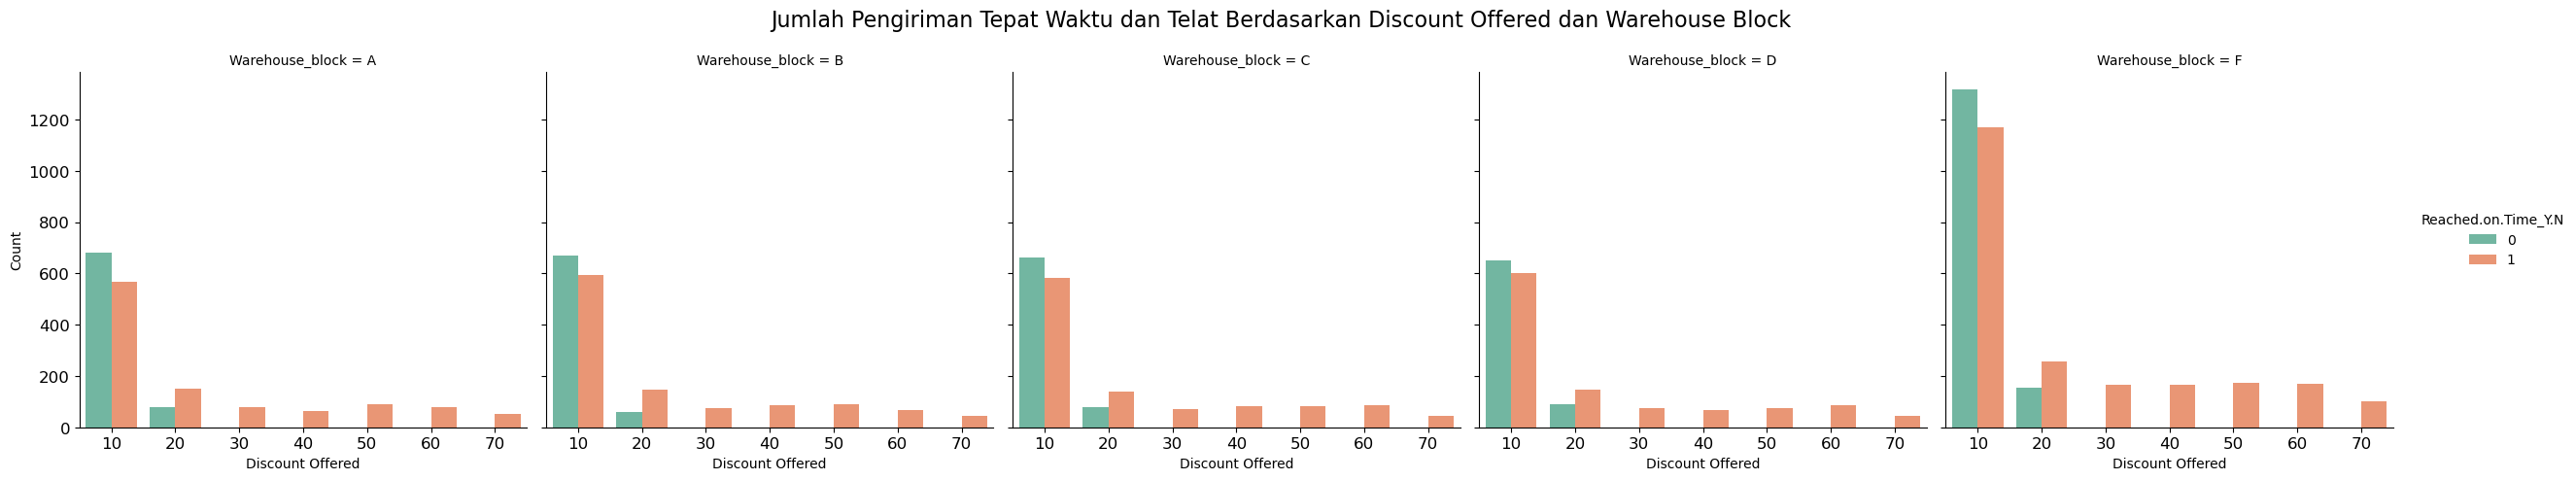

In [99]:
# Menghitung jumlah pengiriman tepat waktu dan telat berdasarkan warehouse dan kategori berat
pivot_table = df.pivot_table(index=['Warehouse_block', 'disc_category'], columns='Reached.on.Time_Y.N', aggfunc='size', fill_value=0)

# Mengatur ulang data untuk visualisasi
df_counts = df.groupby(['Warehouse_block', 'disc_category', 'Reached.on.Time_Y.N']).size().reset_index(name='count')

# Membuat plot
plt.figure(figsize=(25, 5))
g = sns.catplot(
    data=df_counts,
    x='disc_category',
    y='count',
    hue='Reached.on.Time_Y.N',
    col='Warehouse_block',
    kind='bar',
    palette='Set2',
    height=5,
    aspect=1
)

# Menambahkan judul dan label sumbu
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Jumlah Pengiriman Tepat Waktu dan Telat Berdasarkan Discount Offered dan Warehouse Block', fontsize=16)
g.set_axis_labels("Discount Offered", "Count")


# Menampilkan plot
plt.show()

#### 7.3 Menghitung Persentase

In [95]:
# Menghitung jumlah pengiriman tepat waktu dan telat berdasarkan mode pengiriman dan kategori cost of product
pivot_table = df.pivot_table(index=['Warehouse_block', 'disc_category'], columns='Reached.on.Time_Y.N', aggfunc='size', fill_value=0)

# Menghitung persentase pengiriman tepat waktu dan telat
pivot_table['total'] = pivot_table.sum(axis=1)
pivot_table['ontime_percentage'] = pivot_table[0] / pivot_table['total'] * 100
pivot_table['telat_percentage'] = pivot_table[1] / pivot_table['total'] * 100

print(pivot_table)

Reached.on.Time_Y.N               0     1  total  ontime_percentage  \
Warehouse_block disc_category                                         
A               10              679   569   1248          54.407051   
                20               79   150    229          34.497817   
                30                0    77     77           0.000000   
                40                0    62     62           0.000000   
                50                0    88     88           0.000000   
                60                0    78     78           0.000000   
                70                0    51     51           0.000000   
B               10              668   593   1261          52.973830   
                20               61   147    208          29.326923   
                30                0    75     75           0.000000   
                40                0    85     85           0.000000   
                50                0    90     90           0.000000   
      

#### 7.4 Stacked Bar Chart - Persentase

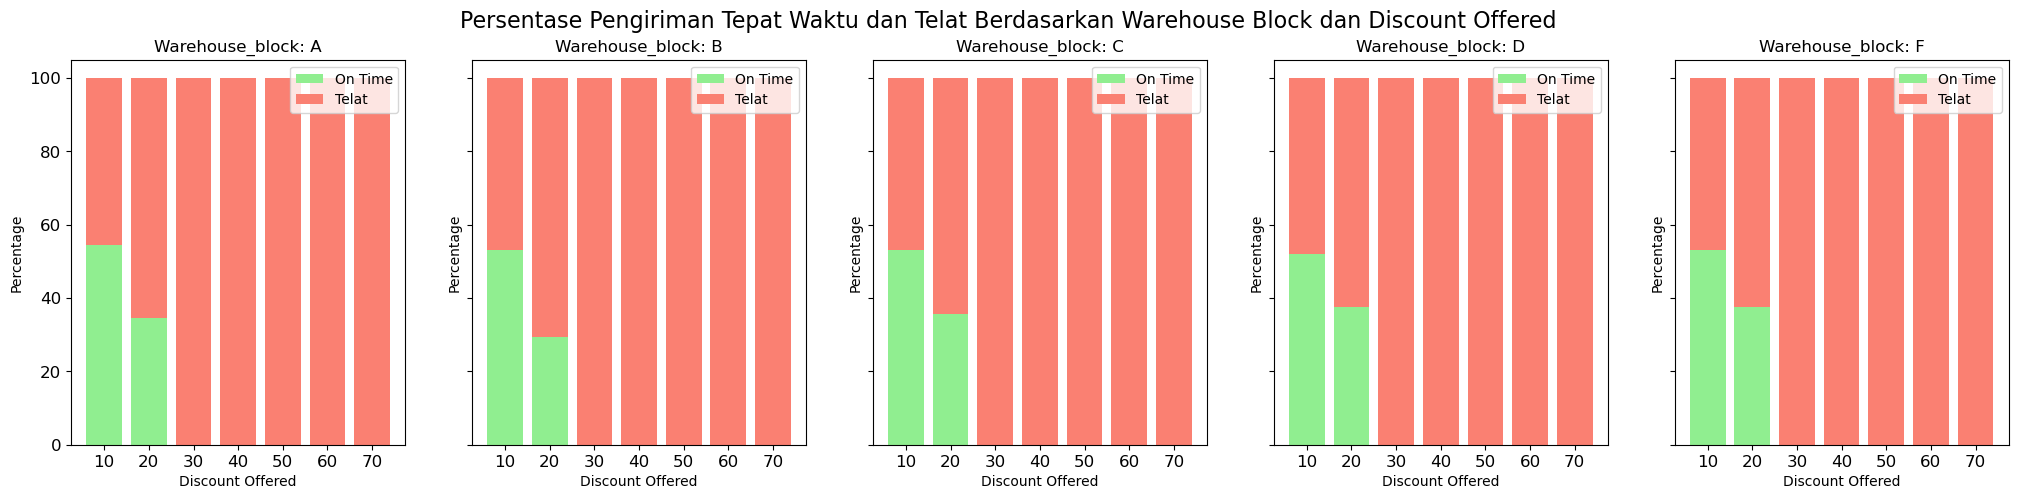

In [119]:
# Menghitung jumlah pengiriman tepat waktu dan telat berdasarkan mode pengiriman dan kategori berat
pivot_table = df.pivot_table(index=['Warehouse_block', 'disc_category'], columns='Reached.on.Time_Y.N', aggfunc='size', fill_value=0)

# Menghitung persentase pengiriman tepat waktu dan telat
pivot_table['total'] = pivot_table.sum(axis=1)
pivot_table['ontime_percentage'] = pivot_table[0] / pivot_table['total'] * 100
pivot_table['telat_percentage'] = pivot_table[1] / pivot_table['total'] * 100

# Menyiapkan data untuk visualisasi stacked bar
pivot_table = pivot_table.reset_index()

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(25,5), sharey=True)

for i, mode in enumerate(pivot_table['Warehouse_block'].unique()):
    subset = pivot_table[pivot_table['Warehouse_block'] == mode]
    axes[i].bar(subset['disc_category'], subset['ontime_percentage'], label='On Time', color='lightgreen')
    axes[i].bar(subset['disc_category'], subset['telat_percentage'], bottom=subset['ontime_percentage'], label='Telat', color='salmon')
    axes[i].set_title(f'Warehouse_block: {mode}')
    axes[i].set_xlabel('Discount Offered')
    axes[i].set_ylabel('Percentage')
    axes[i].legend()

# Menambahkan judul keseluruhan
plt.suptitle('Persentase Pengiriman Tepat Waktu dan Telat Berdasarkan Warehouse Block dan Discount Offered', fontsize=16)

plt.show()

### 8. Discount Offered vs Shipment

#### 8.1 Membuat Kategori Discount

In [ ]:
# Membuat kolom kategori cost
bins = [0, 10, 20, 30, 40, 50, 60, 70]
labels = ['10', '20', '30', '40', '50', '60', '70']
df['disc_category'] = pd.cut(df['Discount_offered'], bins=bins, labels=labels, right=False)

#### 8.2 Jumlah Pengiriman Tepat Waktu dan Telat Berdasarkan Discount Offered dan Mode of Shipment

<Figure size 2500x500 with 0 Axes>

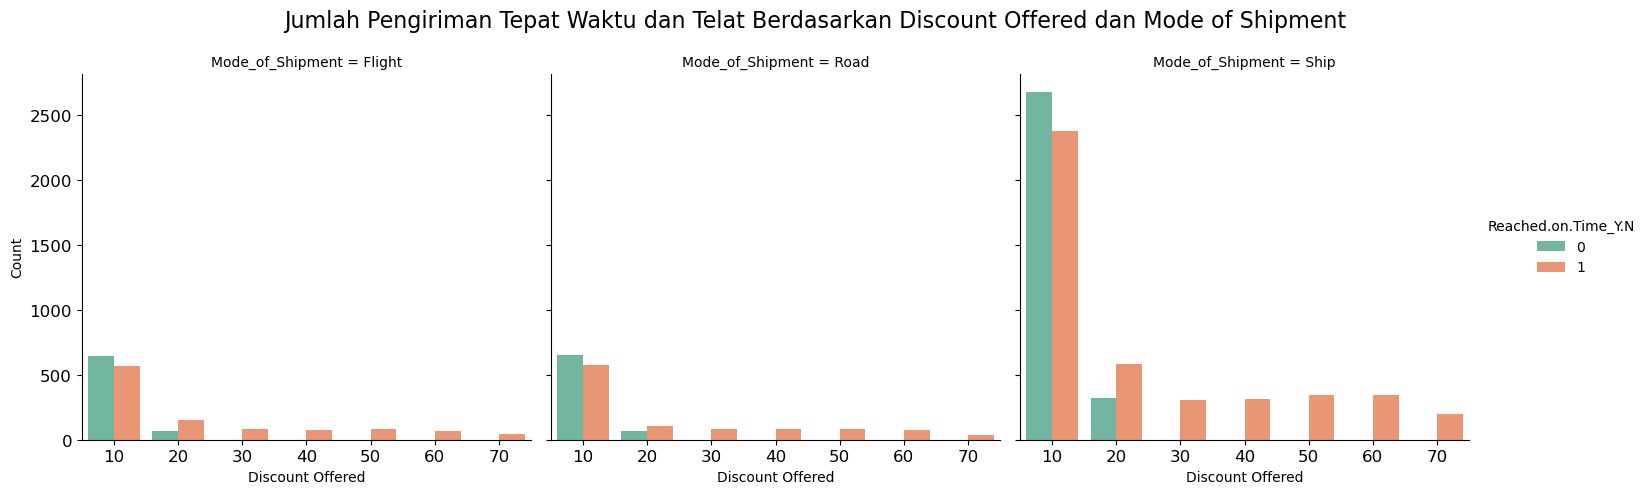

In [105]:
# Menghitung jumlah pengiriman tepat waktu dan telat berdasarkan warehouse dan kategori berat
pivot_table = df.pivot_table(index=['Mode_of_Shipment', 'disc_category'], columns='Reached.on.Time_Y.N', aggfunc='size', fill_value=0)

# Mengatur ulang data untuk visualisasi
df_counts = df.groupby(['Mode_of_Shipment', 'disc_category', 'Reached.on.Time_Y.N']).size().reset_index(name='count')

# Membuat plot
plt.figure(figsize=(25, 5))
g = sns.catplot(
    data=df_counts,
    x='disc_category',
    y='count',
    hue='Reached.on.Time_Y.N',
    col='Mode_of_Shipment',
    kind='bar',
    palette='Set2',
    height=5,
    aspect=1
)

# Menambahkan judul dan label sumbu
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Jumlah Pengiriman Tepat Waktu dan Telat Berdasarkan Discount Offered dan Mode of Shipment', fontsize=16)
g.set_axis_labels("Discount Offered", "Count")


# Menampilkan plot
plt.show()

#### 8.3 Menghitung Persentase

In [106]:
# Menghitung jumlah pengiriman tepat waktu dan telat berdasarkan mode pengiriman dan Discount Offered
pivot_table = df.pivot_table(index=['Mode_of_Shipment', 'disc_category'], columns='Reached.on.Time_Y.N', aggfunc='size', fill_value=0)

# Menghitung persentase pengiriman tepat waktu dan telat
pivot_table['total'] = pivot_table.sum(axis=1)
pivot_table['ontime_percentage'] = pivot_table[0] / pivot_table['total'] * 100
pivot_table['telat_percentage'] = pivot_table[1] / pivot_table['total'] * 100

print(pivot_table)

Reached.on.Time_Y.N                0     1  total  ontime_percentage  \
Mode_of_Shipment disc_category                                         
Flight           10              642   564   1206          53.233831   
                 20               66   154    220          30.000000   
                 30                0    83     83           0.000000   
                 40                0    71     71           0.000000   
                 50                0    81     81           0.000000   
                 60                0    69     69           0.000000   
                 70                0    47     47           0.000000   
Road             10              655   574   1229          53.295362   
                 20               70   104    174          40.229885   
                 30                0    80     80           0.000000   
                 40                0    81     81           0.000000   
                 50                0    84     84           0.00

#### 8.4 Stacked Bar Chart - Persentase

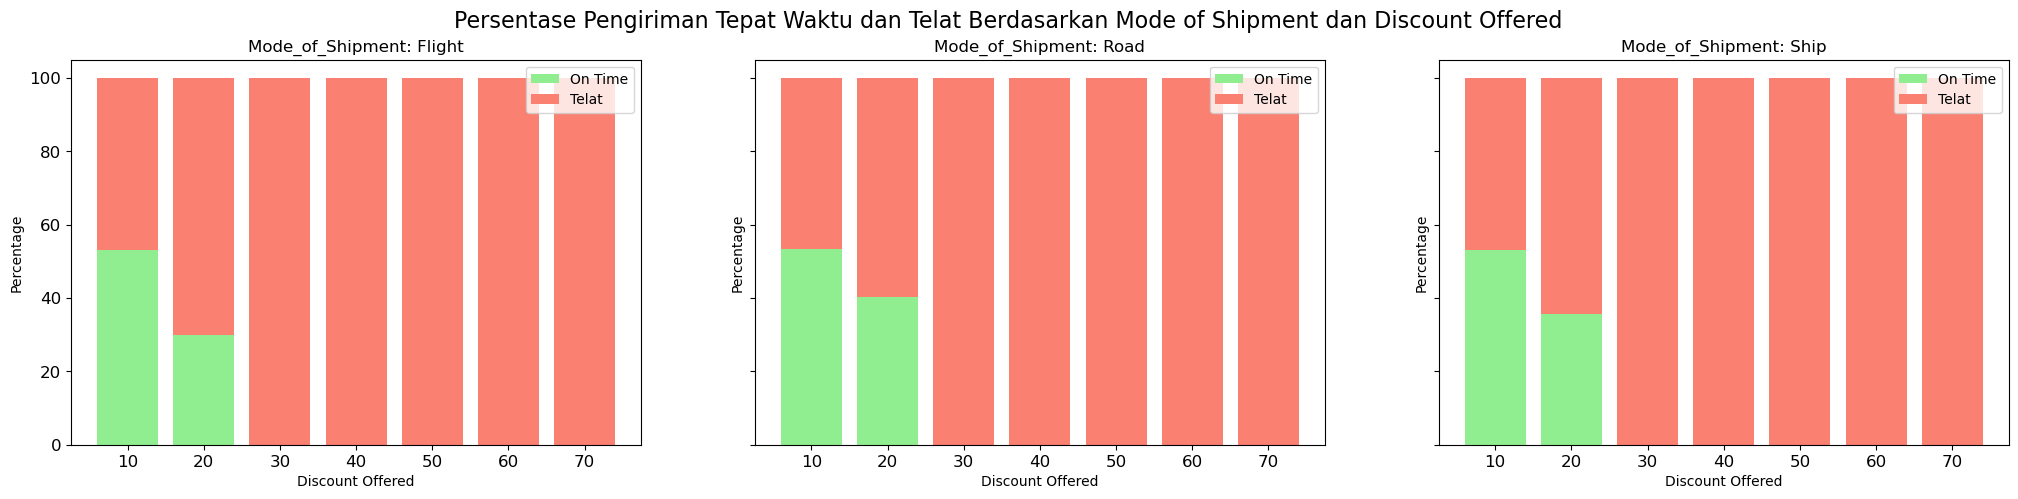

In [118]:
# Menghitung jumlah pengiriman tepat waktu dan telat berdasarkan mode pengiriman dan kategori berat
pivot_table = df.pivot_table(index=['Mode_of_Shipment', 'disc_category'], columns='Reached.on.Time_Y.N', aggfunc='size', fill_value=0)

# Menghitung persentase pengiriman tepat waktu dan telat
pivot_table['total'] = pivot_table.sum(axis=1)
pivot_table['ontime_percentage'] = pivot_table[0] / pivot_table['total'] * 100
pivot_table['telat_percentage'] = pivot_table[1] / pivot_table['total'] * 100

# Menyiapkan data untuk visualisasi stacked bar
pivot_table = pivot_table.reset_index()

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25,5), sharey=True)

for i, mode in enumerate(pivot_table['Mode_of_Shipment'].unique()):
    subset = pivot_table[pivot_table['Mode_of_Shipment'] == mode]
    axes[i].bar(subset['disc_category'], subset['ontime_percentage'], label='On Time', color='lightgreen')
    axes[i].bar(subset['disc_category'], subset['telat_percentage'], bottom=subset['ontime_percentage'], label='Telat', color='salmon')
    axes[i].set_title(f'Mode_of_Shipment: {mode}')
    axes[i].set_xlabel('Discount Offered')
    axes[i].set_ylabel('Percentage')
    axes[i].legend()

# Menambahkan judul keseluruhan
plt.suptitle('Persentase Pengiriman Tepat Waktu dan Telat Berdasarkan Mode of Shipment dan Discount Offered', fontsize=16)

plt.show()

### xxxx. Ontime Berdasarkan Warehouse

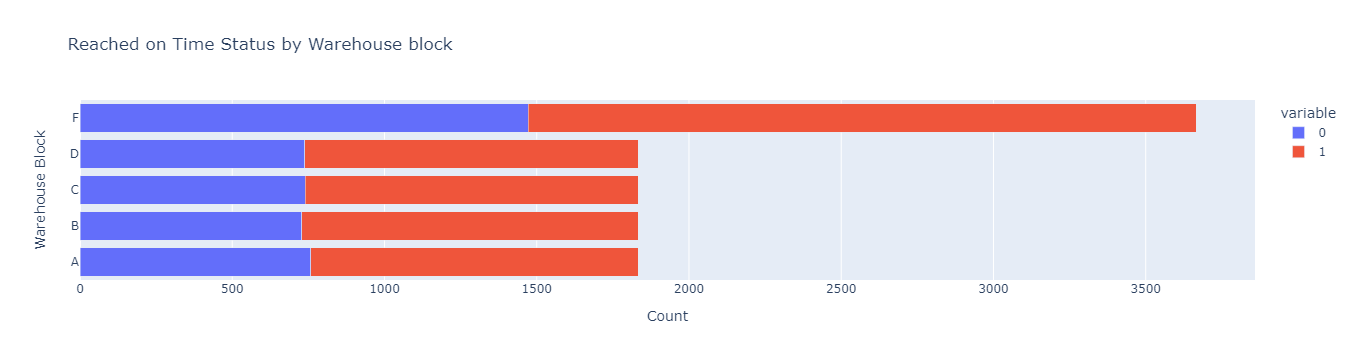

In [30]:
# Ontime Warehouse Block
sum_reached_on_time = df.groupby("Warehouse_block")["Reached.on.Time_Y.N"].value_counts().unstack(fill_value=0).reset_index()

fig = px.bar(sum_reached_on_time, x=[0, 1], y="Warehouse_block", title="Reached on Time Status by Warehouse block",
             labels={"value": "Count", "Warehouse_block": "Warehouse Block", "Reached.on.Time_Y.N": "Reached on Time"},
             orientation='h')
fig.update_layout(barmode='stack')
fig.show()


Insight: <br>
Warehouse dengan jumlah produk yang lebih banyak menyumbang ketepatan waktu pengiriman produk yang lebih banyak juga, yaitu pada warehouse F. <br>
<br>
Rekomendasi:<br>
Sebaiknya pihak e-commerce menganalisa tipe seperti apa warehouse F dan mengaplikasikannya pada tipe warehouse lainnya

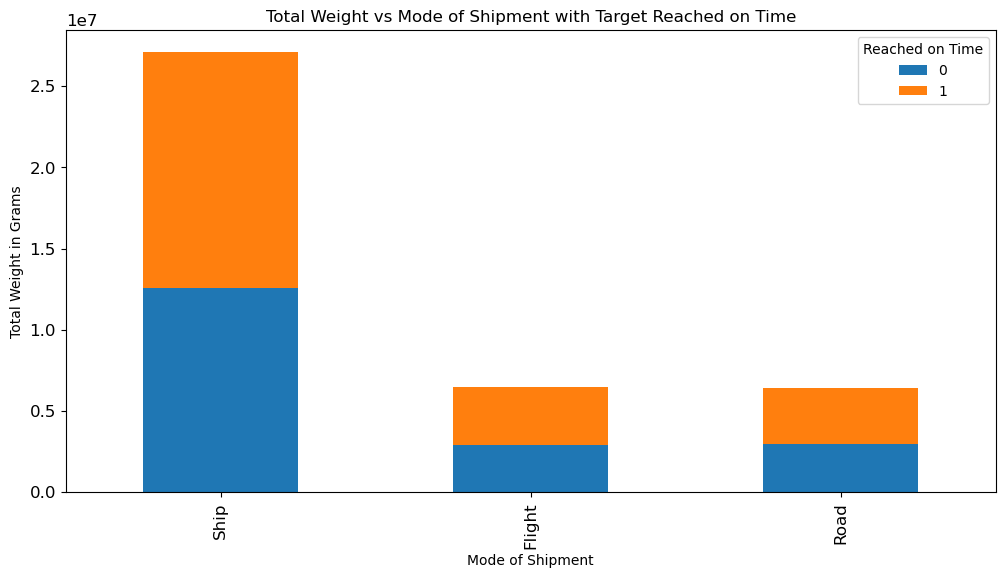

In [116]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Menghitung total berat berdasarkan 'Mode_of_Shipment' dan 'Reached_on_Time_Y_N'
pivot_table = df.pivot_table(values='Weight_in_gms', index='Mode_of_Shipment', columns='Reached.on.Time_Y.N', aggfunc=np.sum, fill_value=0)

# Mengurutkan index untuk memastikan urutan 'Mode_of_Shipment' sesuai urutan yang diinginkan
pivot_table = pivot_table.reindex(['Ship', 'Flight', 'Road'])

# Membuat stacked bar plot
pivot_table.plot(kind='bar', stacked=True, figsize=(12, 6))

# Menambahkan label dan judul
plt.xlabel('Mode of Shipment')
plt.ylabel('Total Weight in Grams')
plt.title('Total Weight vs Mode of Shipment with Target Reached on Time')
plt.legend(title='Reached on Time')

# Menampilkan plot
plt.show()
